### Daniele Pelizan

# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# To help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)  # adds a nice background to the graphs

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Libraries to import logistic regression, decision tree classifier and different ensemble classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Libraries to split data
from sklearn.model_selection import train_test_split

# To get different metric scores
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
# reading the train data
ReneWind = pd.read_csv("Train.csv")

<IPython.core.display.Javascript object>

In [3]:
# reading the test data
ReneWind_test = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

In [4]:
# copying train data to another variable to avoid any changes to original data
df = ReneWind.copy()

<IPython.core.display.Javascript object>

In [5]:
# copying test data to another variable to avoid any changes to original data
df_test = ReneWind_test.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the train dataset

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


<IPython.core.display.Javascript object>

In [7]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


<IPython.core.display.Javascript object>

* There are 40 sensors with information for different components of the wind turbine and information related to environmental factors. The type of data collected is ciphered, with column names going from V1 to V40.
* All the columns are numerical.
* The Target column is our target variable, where 1 represents failure and 0 represents no failure.
* If target is equal to 1 failure, the generator is going to be inspected/repaired before breaking.

### View the first 5 rows of the test dataset

In [8]:
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,-0.733,2.210,8.083,7.063,-1.510,-3.261,-3.334,-3.019,3.557,-1.511,-6.695,-1.937,0.141,-3.471,-4.233,-10.416,5.479,-0.023,6.036,6.603,-8.320,0.104,-6.879,1.457,2.110,3.381,-4.467,0.996,-1.409,-0.694,-2.577,-3.270,-1.806,1.798,5.895,-1.312,-0.765,-1.408,0.557,-4.049,0
2,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
3,3.412,1.153,2.114,-2.275,0.088,-0.010,0.514,-1.371,1.863,-0.031,-0.414,-1.567,3.184,0.864,-0.417,-0.996,-3.087,-0.648,-2.732,-2.056,-1.620,-0.091,-1.512,-3.892,1.646,3.147,4.442,-2.524,-2.434,-4.086,2.828,-2.497,-1.776,-1.712,-1.506,2.242,-0.658,-1.862,0.846,0.857,0
4,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0


<IPython.core.display.Javascript object>

* As in the train set, the test data set have the same 40 sensors and the Target variable.

### Understand the shape of the dataset

In [9]:
print(f"The train data set has {df.shape[0]} rows and {df.shape[1]} columns.")

The train data set has 40000 rows and 41 columns.


<IPython.core.display.Javascript object>

In [10]:
print(f"The test data set has {df_test.shape[0]} rows and {df_test.shape[1]} columns.")

The test data set has 10000 rows and 41 columns.


<IPython.core.display.Javascript object>

### Checking for duplicate values

In [11]:
# checking duplicates in the train set
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [12]:
# checking duplicates in the test set
df_test.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the train and test dataset.

### Checking for missing values

In [13]:
# Checking missing values in the train set
df.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# Checking missing values in the test set
df_test.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in the columns `V1` and `V2`for both train and test set.

### Checking the data types of the columns

In [15]:
# Checking the data types of the train set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [16]:
# Checking the data types of the test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

<IPython.core.display.Javascript object>

* In the train and test set all the independent 40 columns are float64 data_types.
* The Target variable is int64 data-type.

### Summary of the dataset

In [17]:
# Summary of the train dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


<IPython.core.display.Javascript object>

In [18]:
# Summary of the test dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,9989.000,-0.260,3.440,-12.382,-2.700,-0.719,1.861,13.504
V2,9993.000,0.417,3.160,-11.625,-1.701,0.456,2.526,14.079
V3,10000.000,2.555,3.395,-12.941,0.238,2.283,4.656,15.409
V4,10000.000,-0.054,3.462,-14.682,-2.371,-0.169,2.144,12.896
V5,10000.000,-0.085,2.102,-7.712,-1.593,-0.144,1.324,7.673
V6,10000.000,-1.014,2.039,-8.949,-2.377,-1.015,0.354,6.273
V7,10000.000,-0.908,1.737,-8.124,-2.035,-0.938,0.189,7.616
V8,10000.000,-0.599,3.343,-12.710,-2.684,-0.387,1.698,10.792
V9,10000.000,0.026,2.180,-7.570,-1.490,-0.086,1.466,8.851
V10,10000.000,0.019,2.169,-8.291,-1.362,0.150,1.537,7.691


<IPython.core.display.Javascript object>

* All the independent variables have negative and positive values.
* The average of the independent variables is around zero.
* The train and test set have similar averages and range of values.

## EDA

### Plotting histograms and boxplots for all the variables

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go for the train set

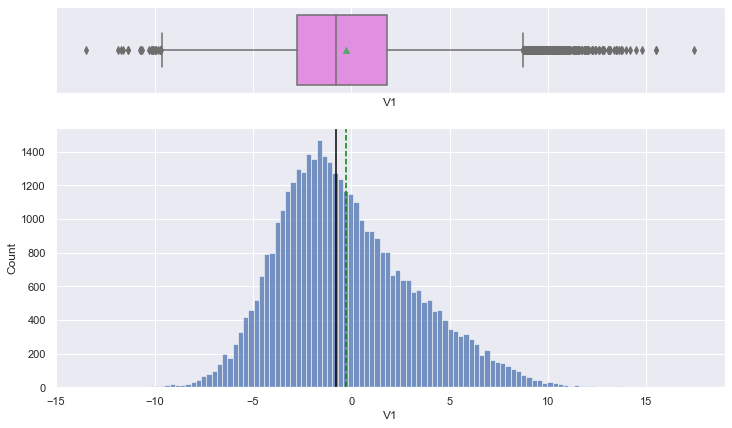

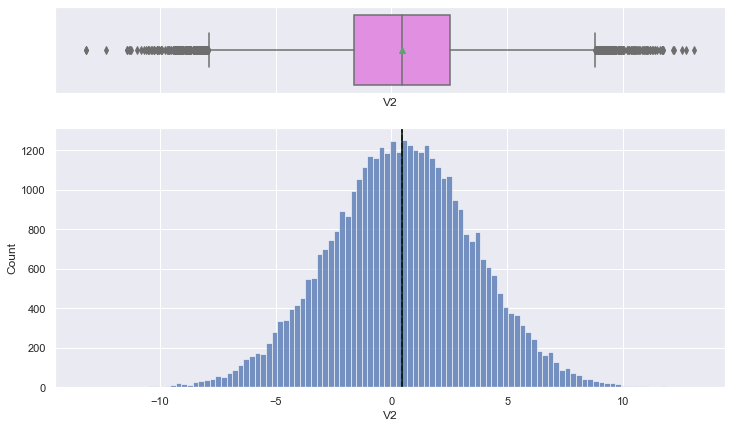

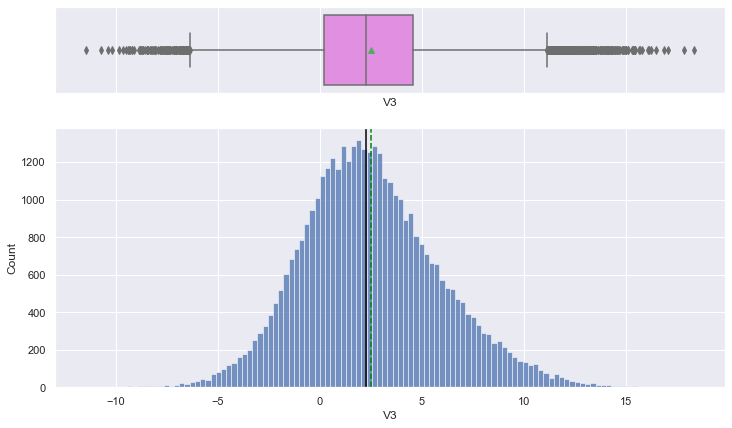

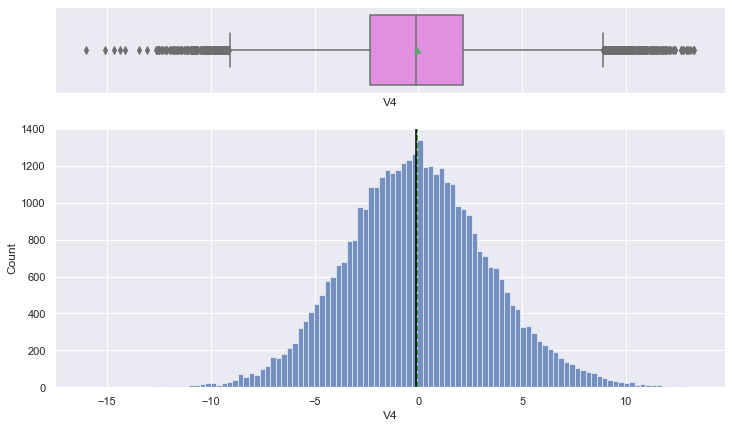

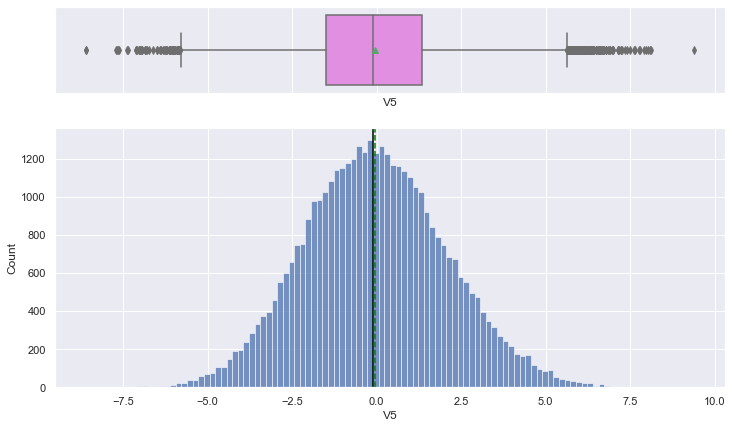

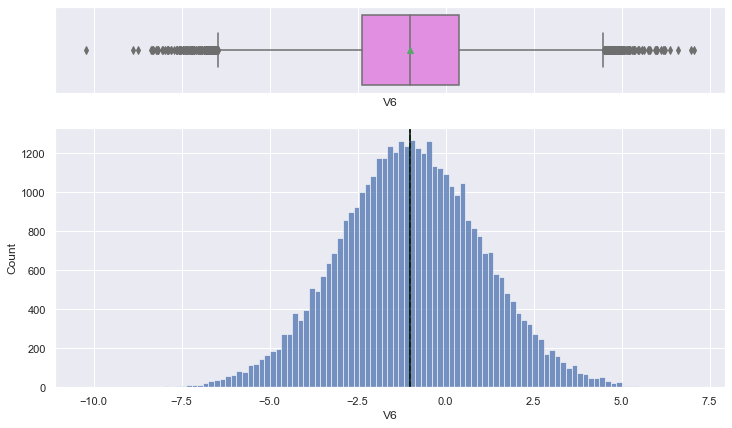

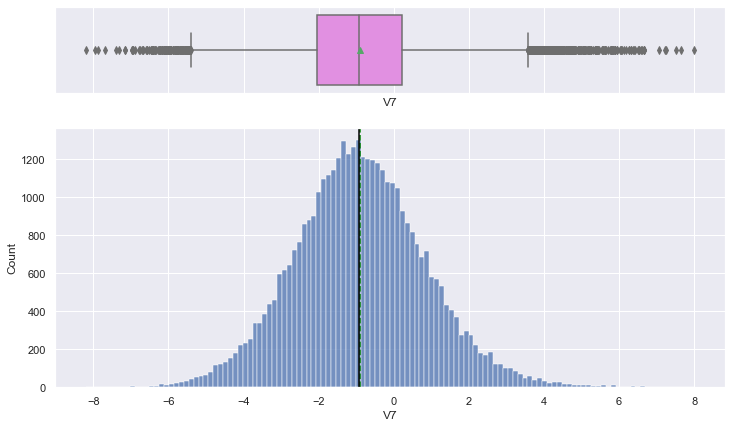

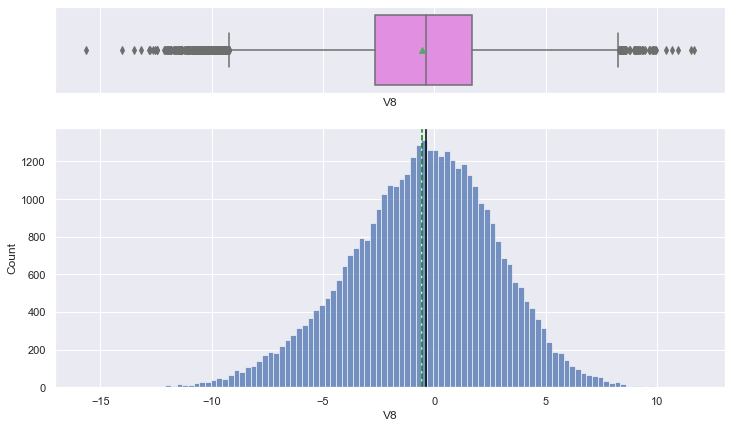

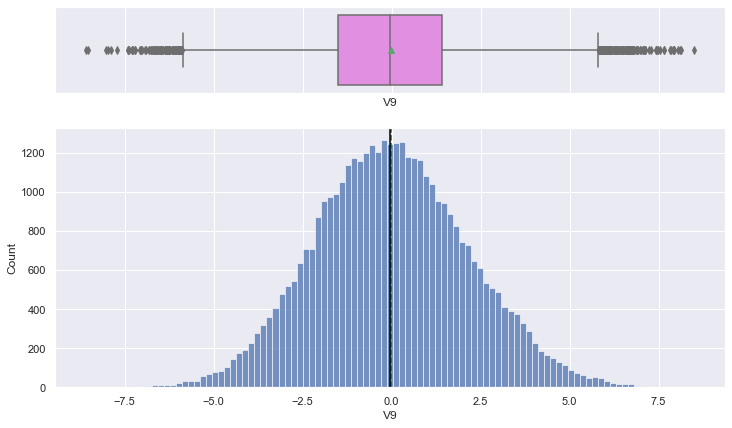

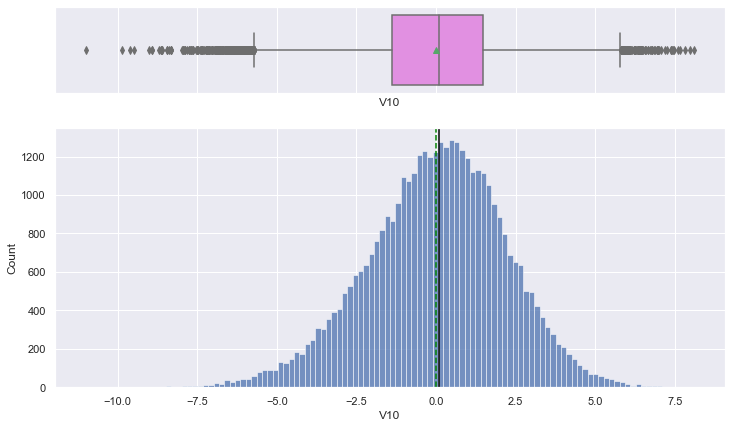

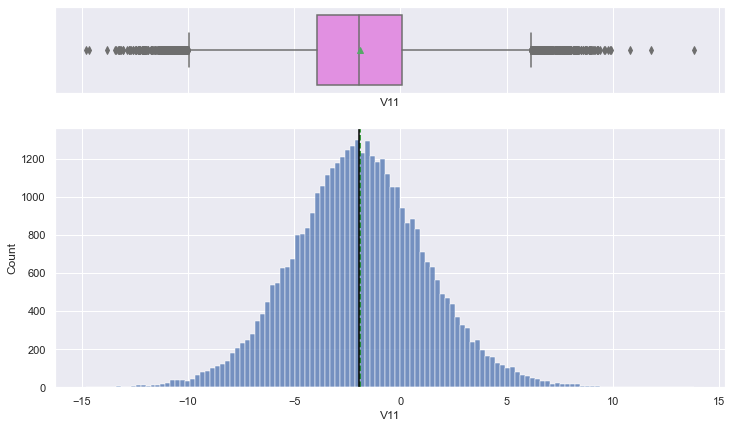

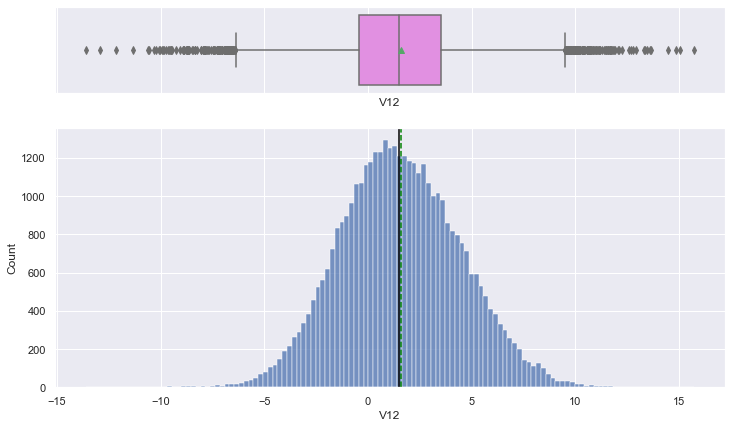

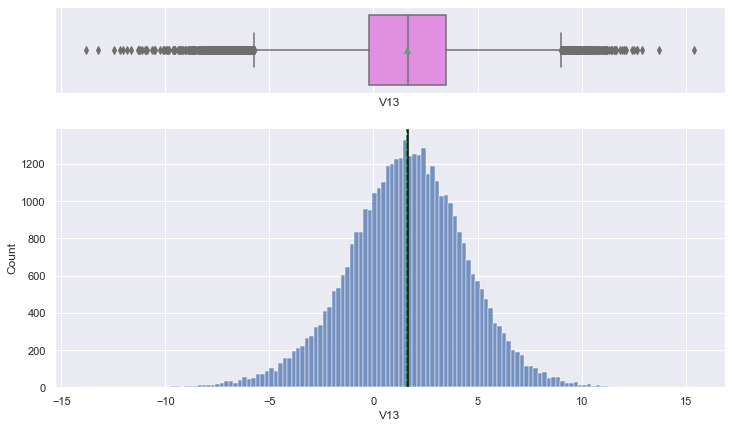

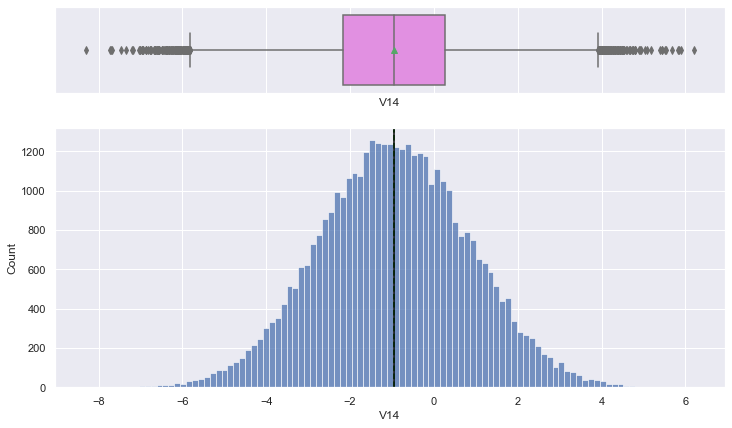

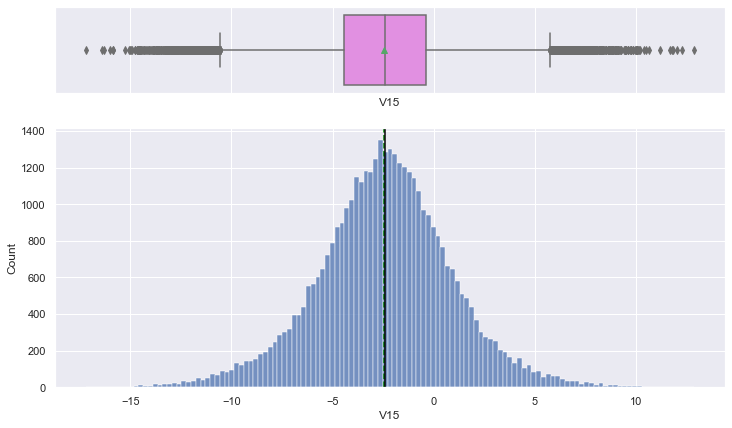

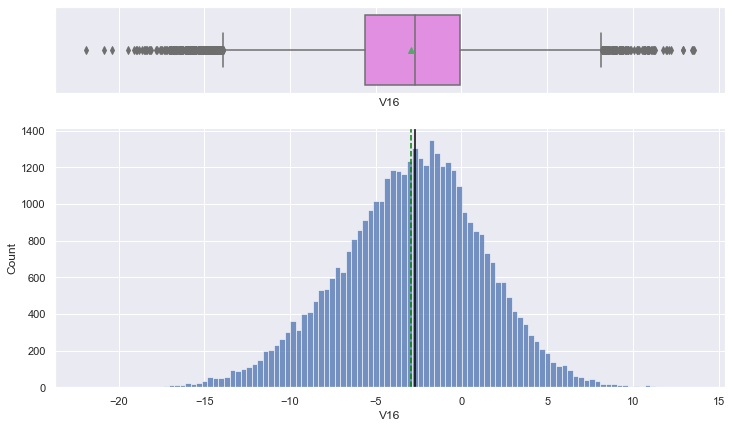

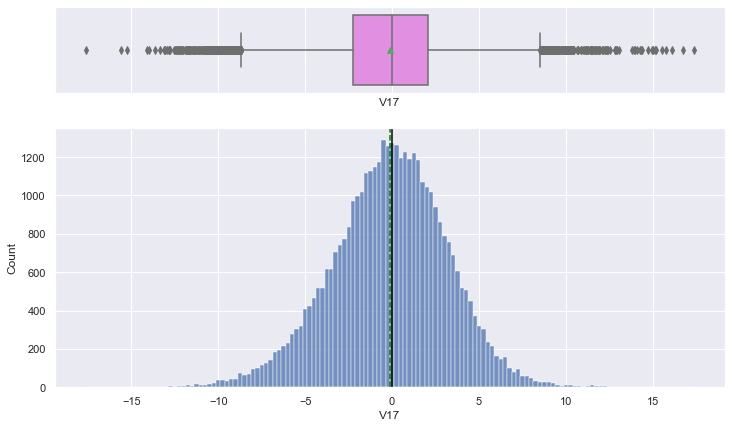

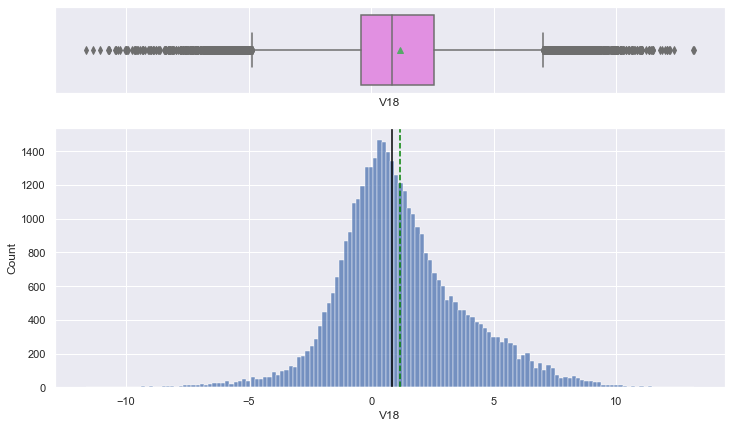

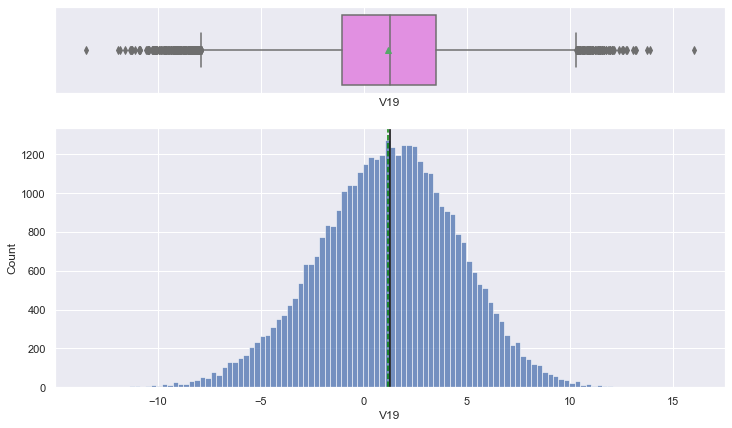

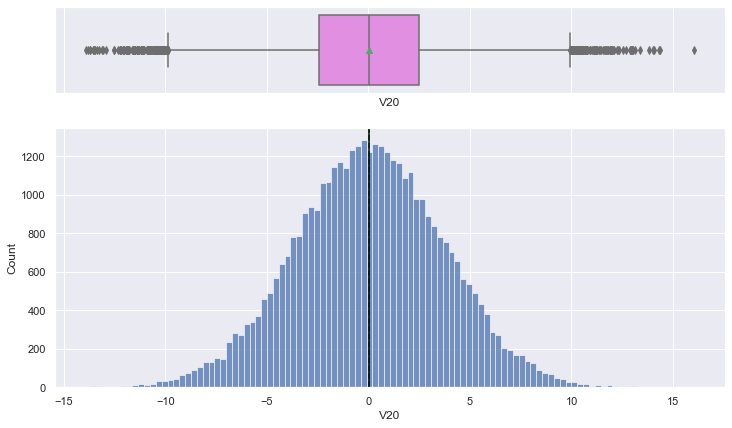

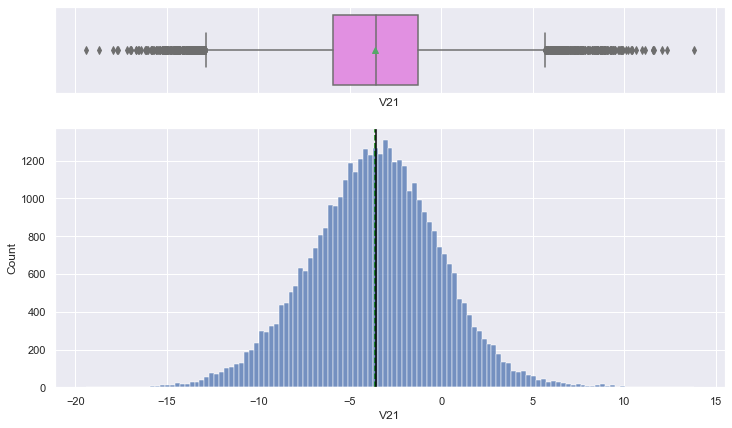

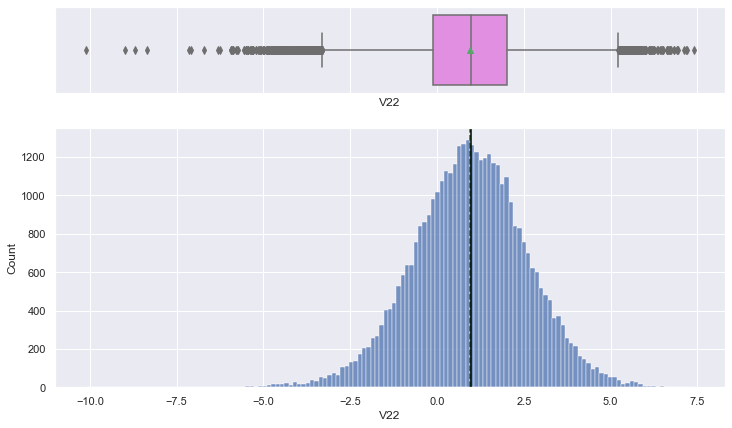

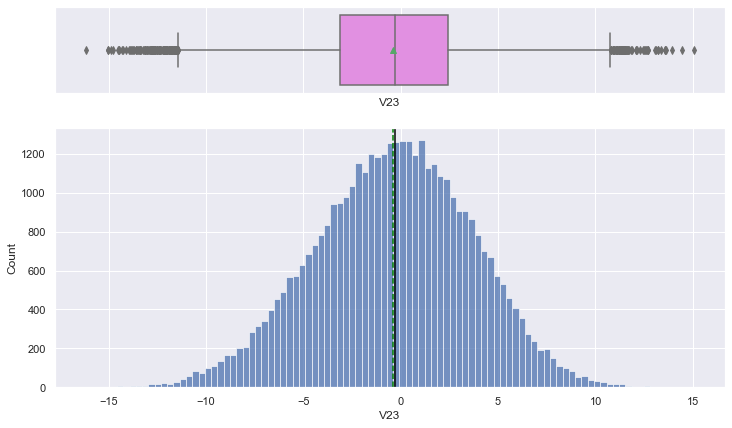

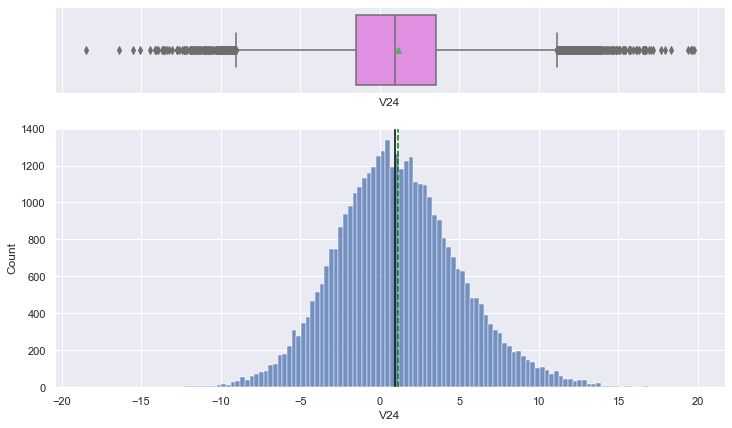

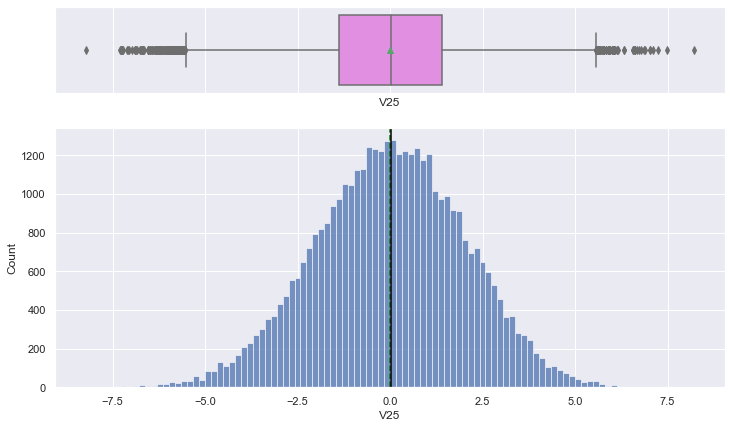

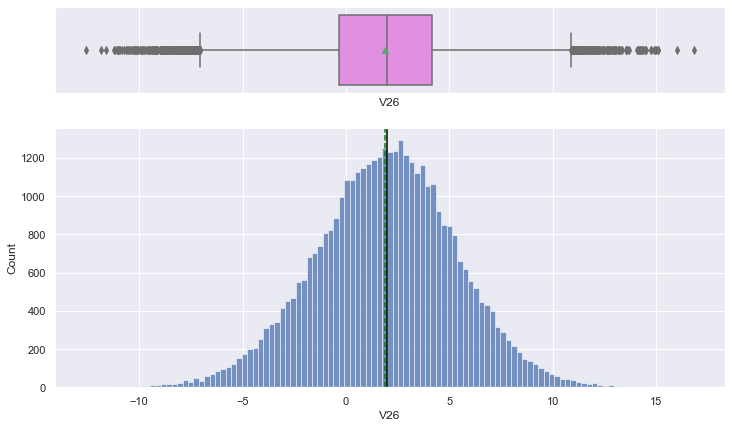

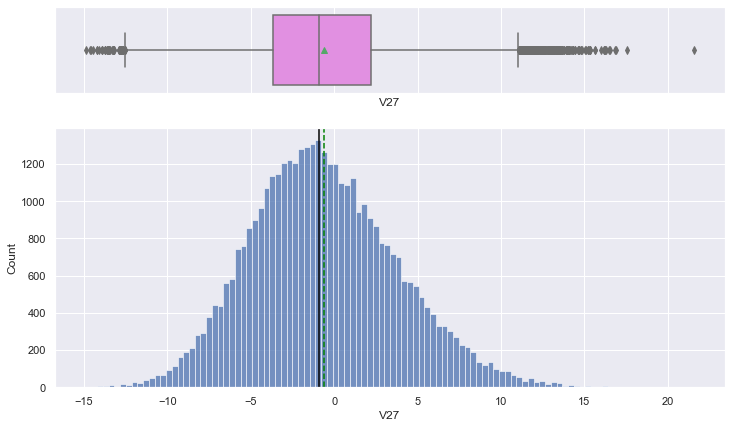

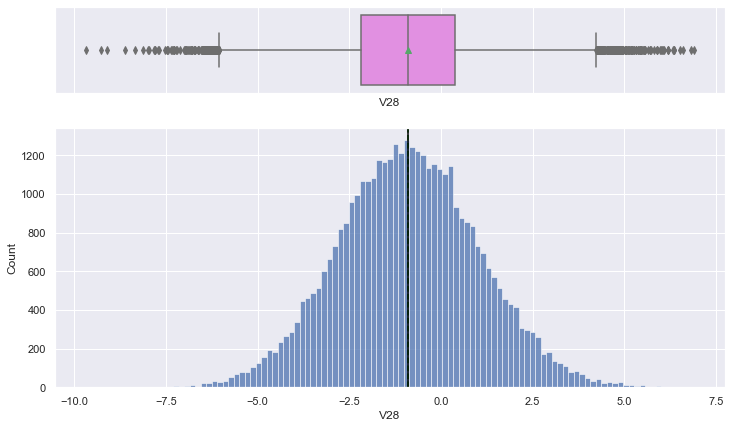

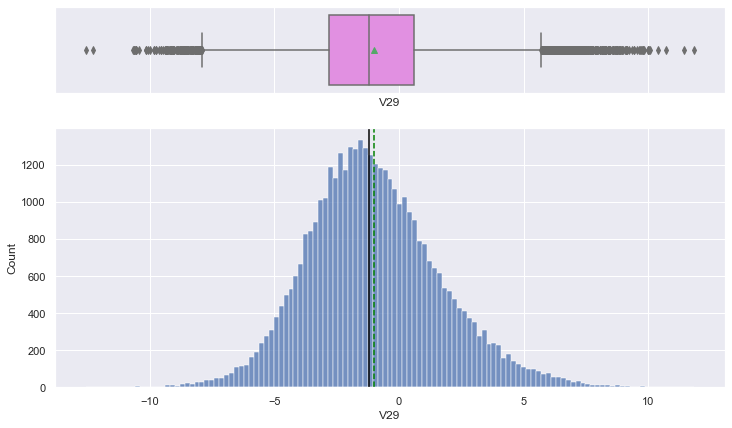

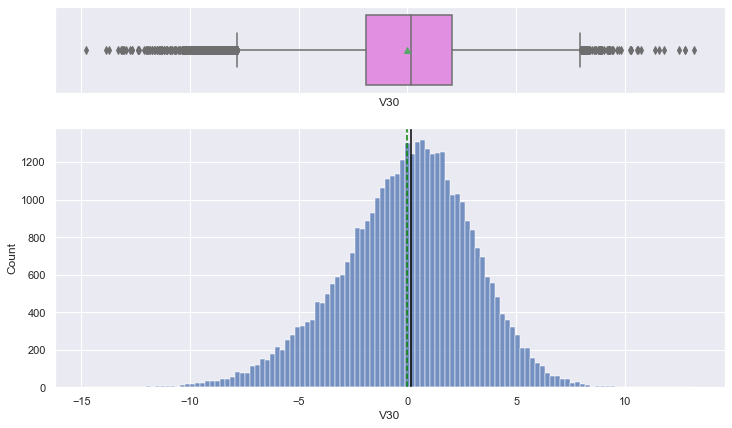

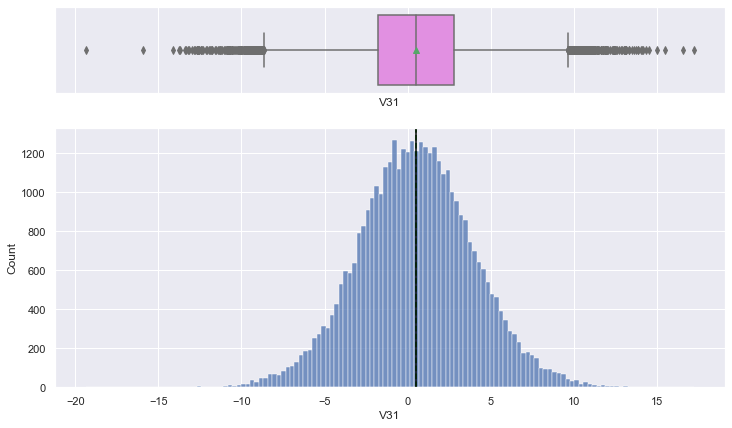

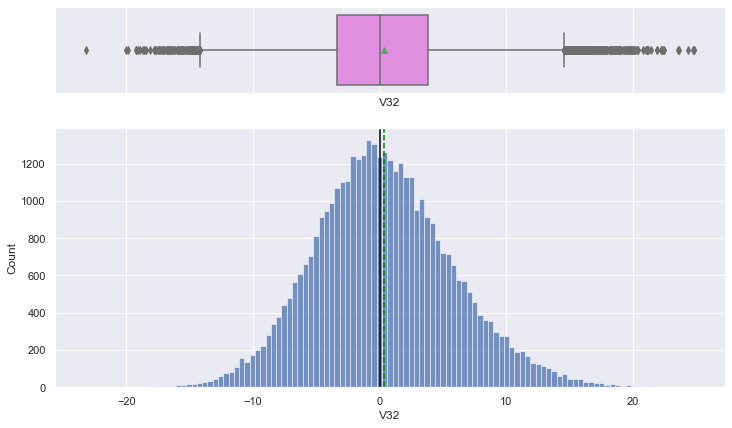

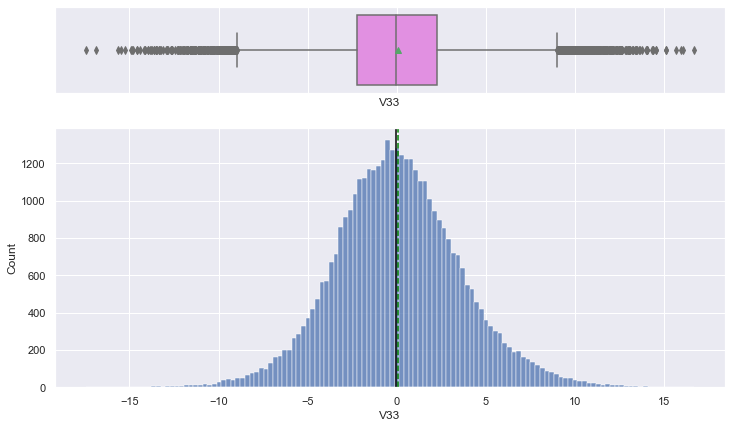

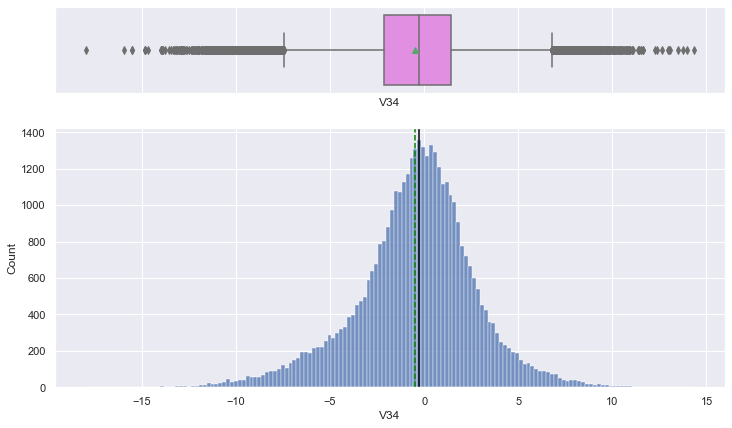

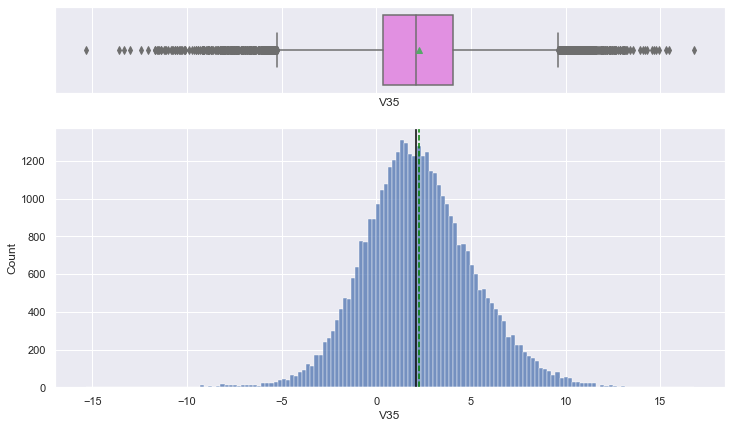

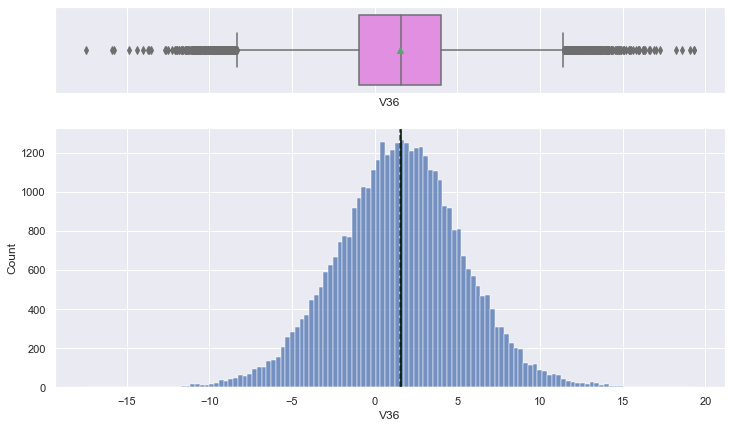

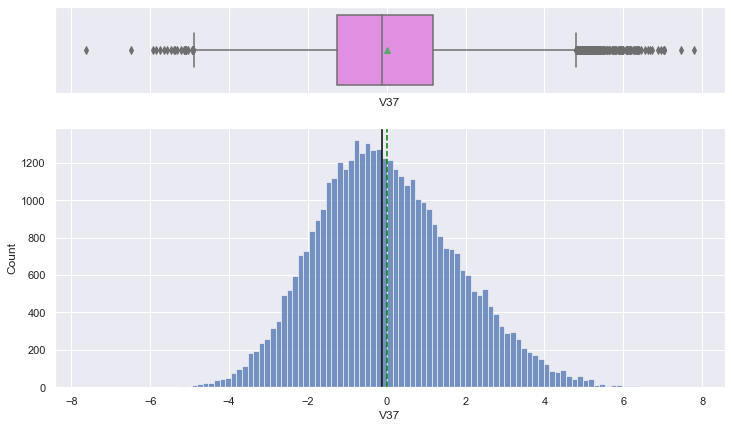

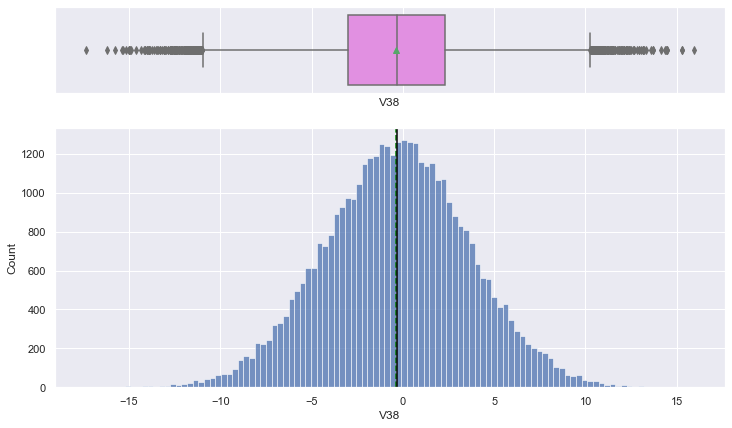

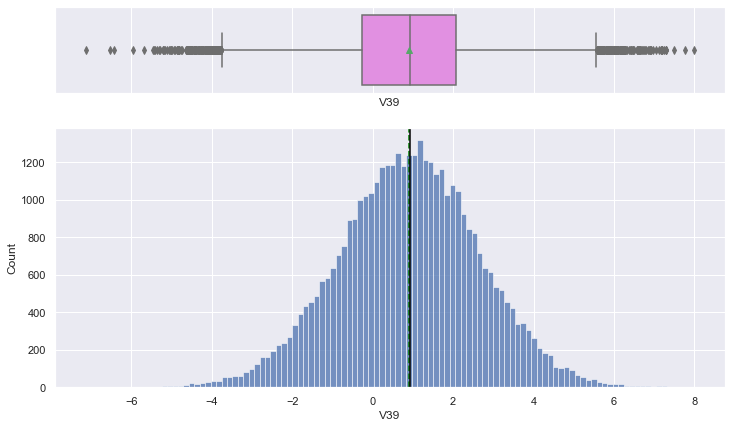

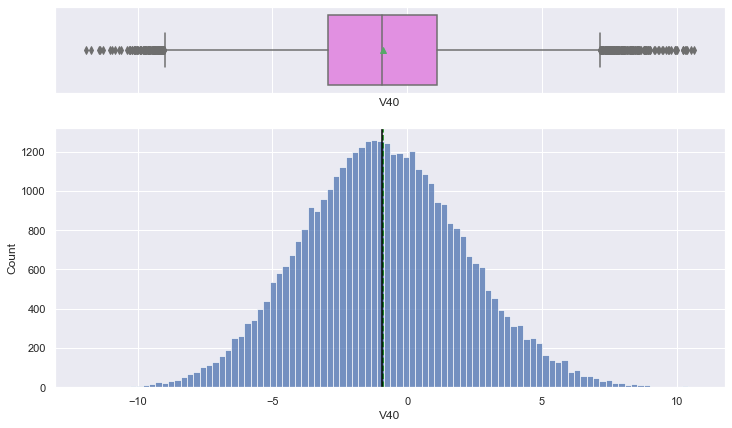

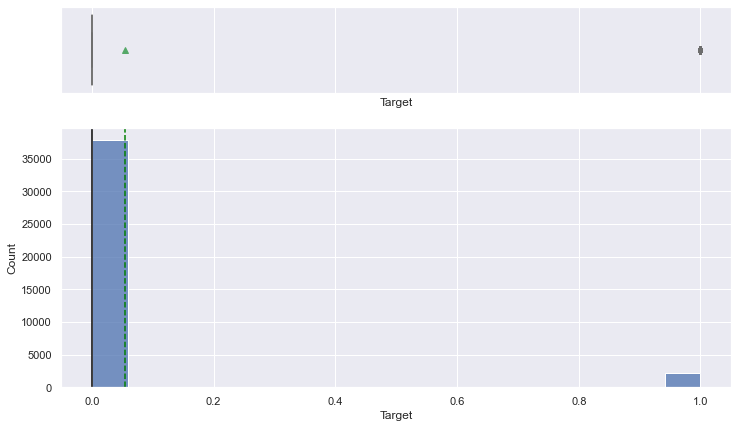

<IPython.core.display.Javascript object>

In [20]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

* All the independent variables have a bell shape of a normal distribution.
* The variables suffered some transformation, wiht the average around zero, values on the left negatives and on the right positives.
* The median and mean are very similar for most of the variables.
* There are outliers on the left and right side of the distribution.
* Since the outliers are not so distant from the whiskers, the outliers are not so far apart from each other (no exreme values) and the data is ciphered, we are admiting that this outliers are real information and we are not going to treat the outliers.

### Plotting all the features at one go for the test set

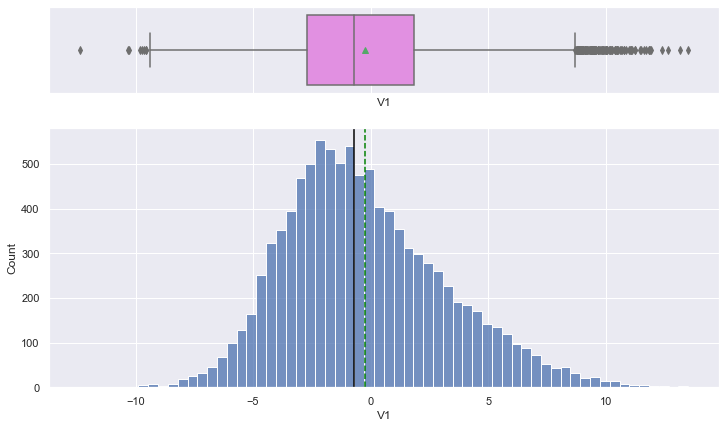

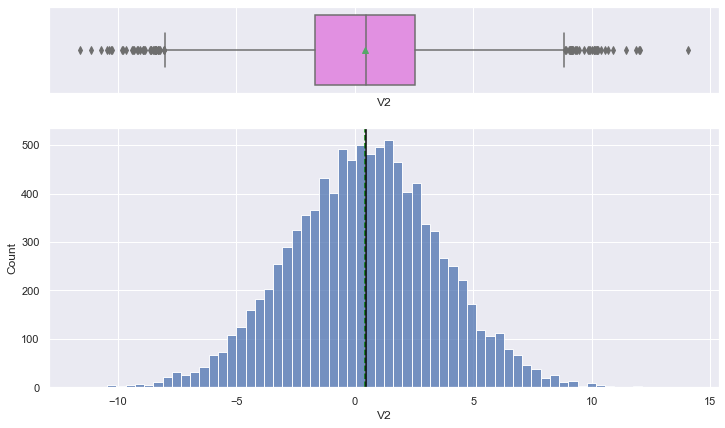

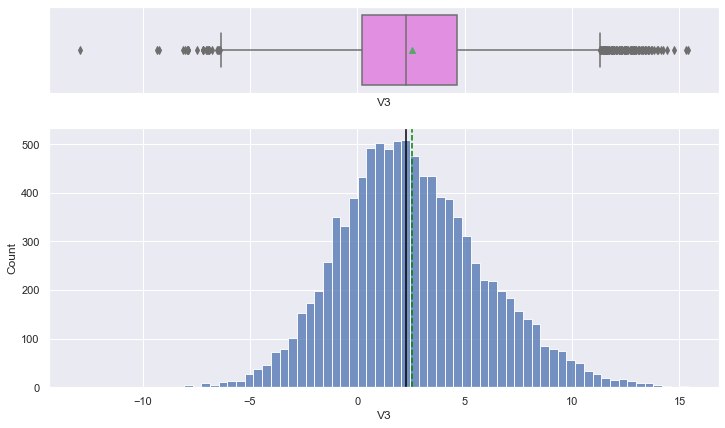

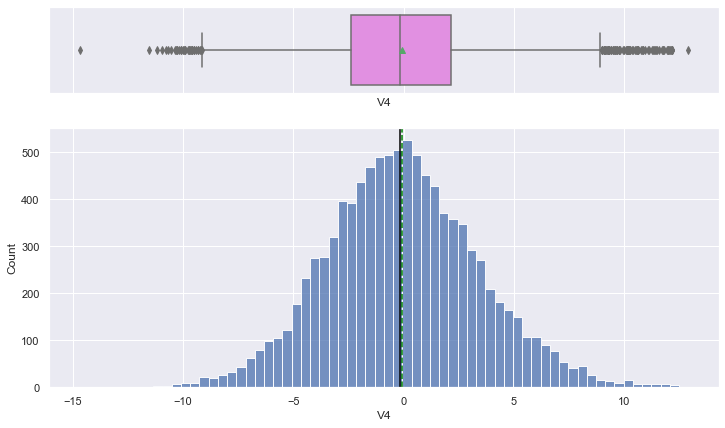

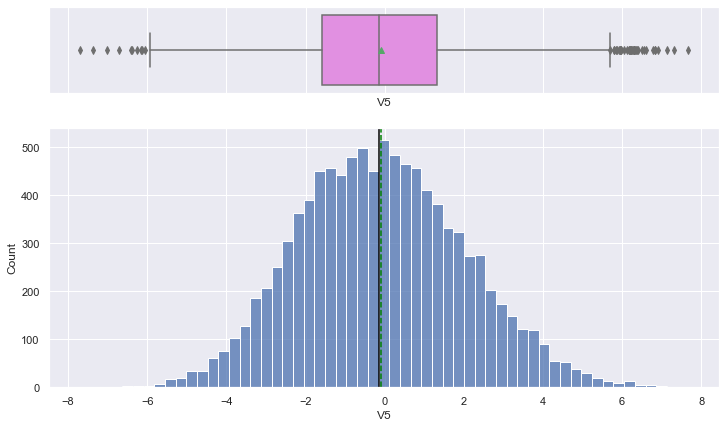

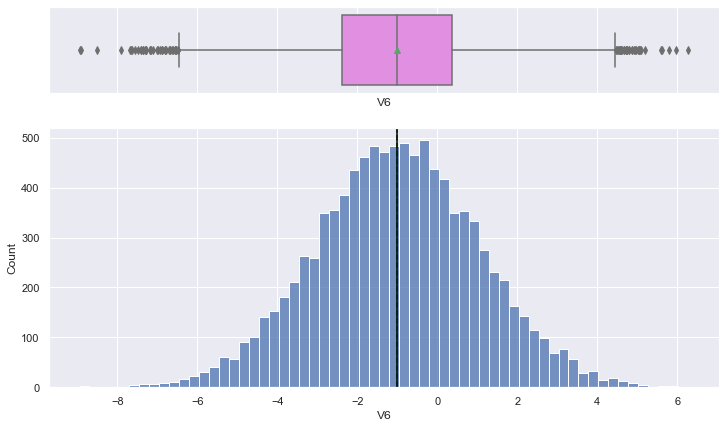

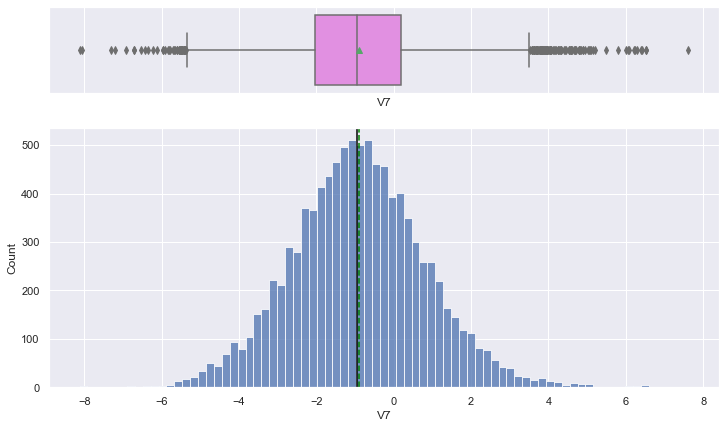

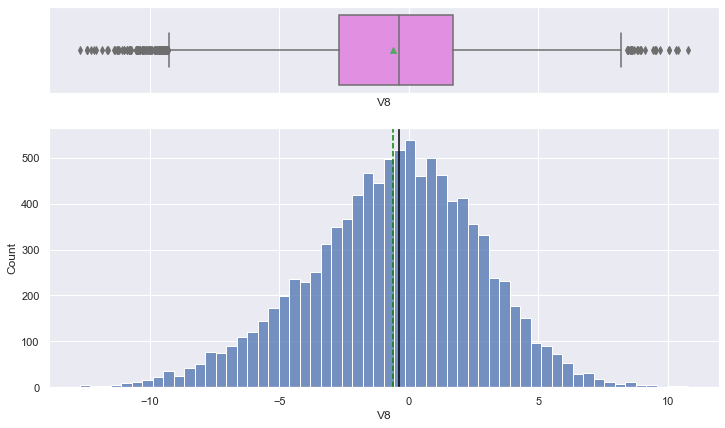

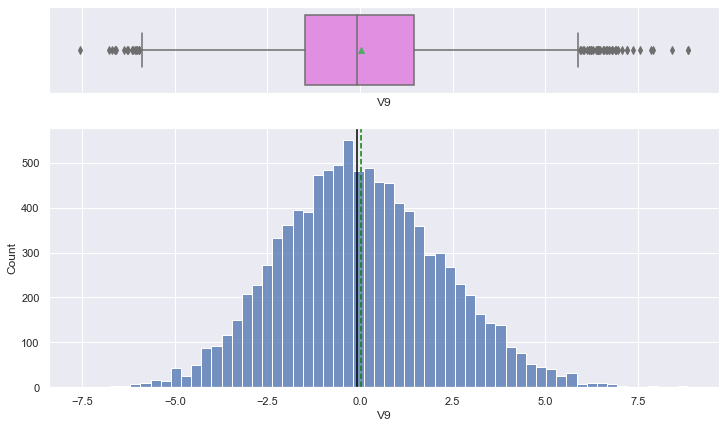

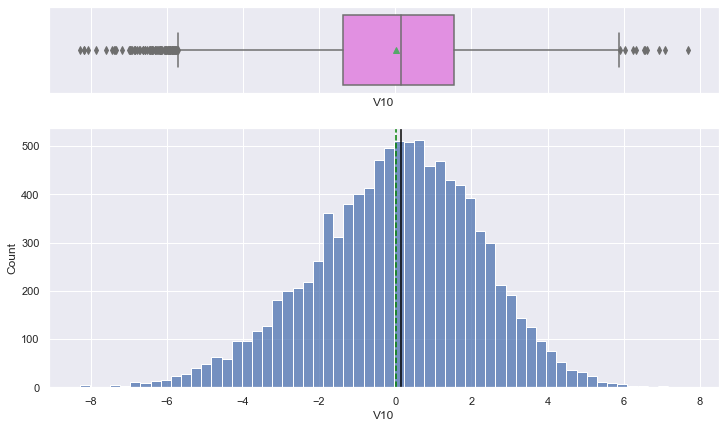

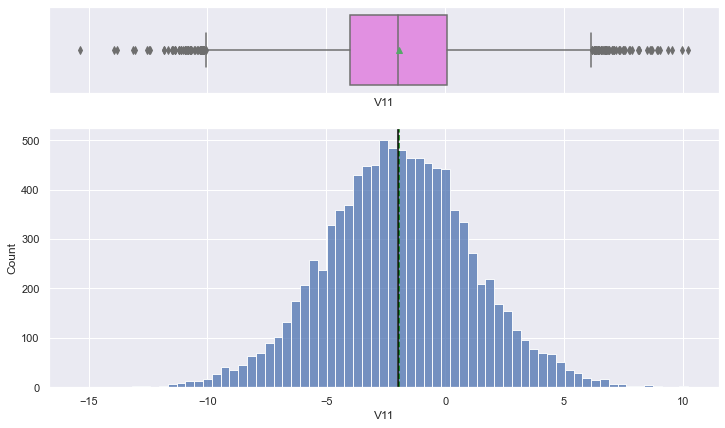

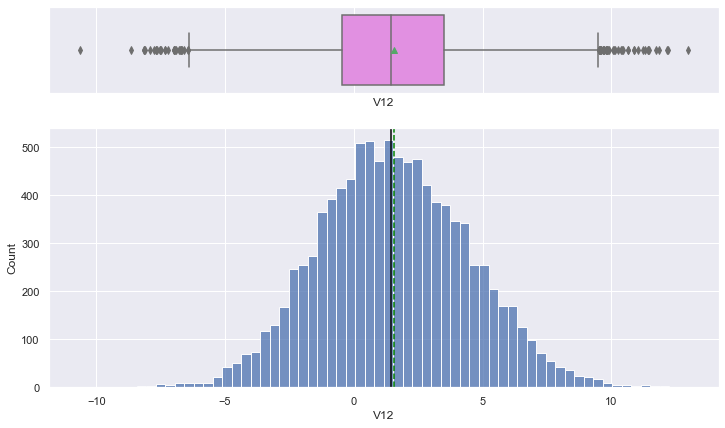

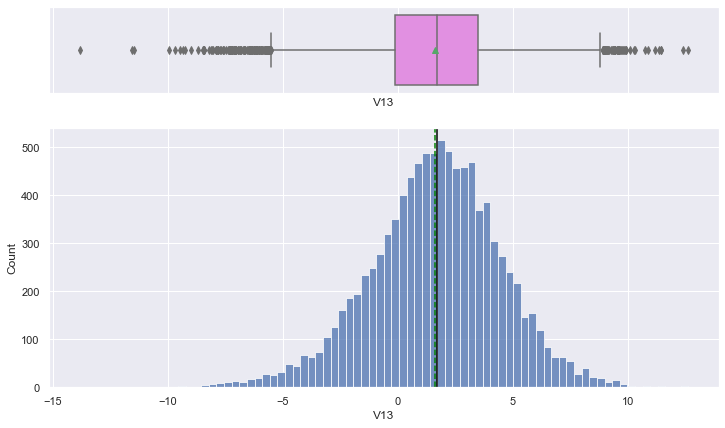

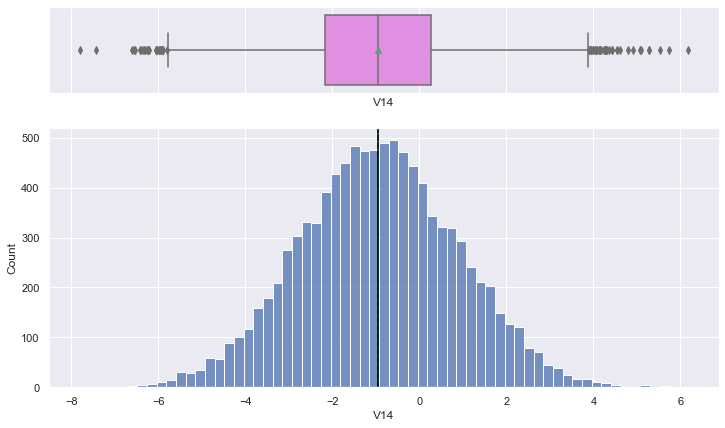

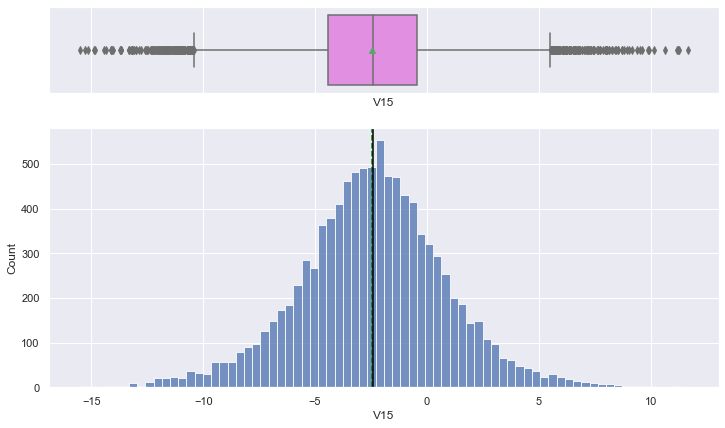

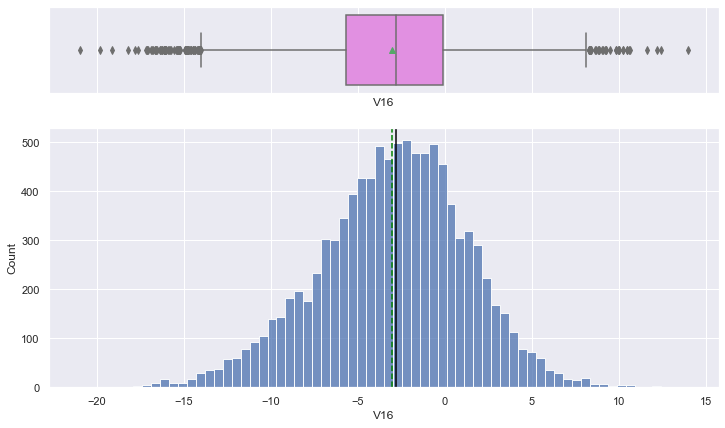

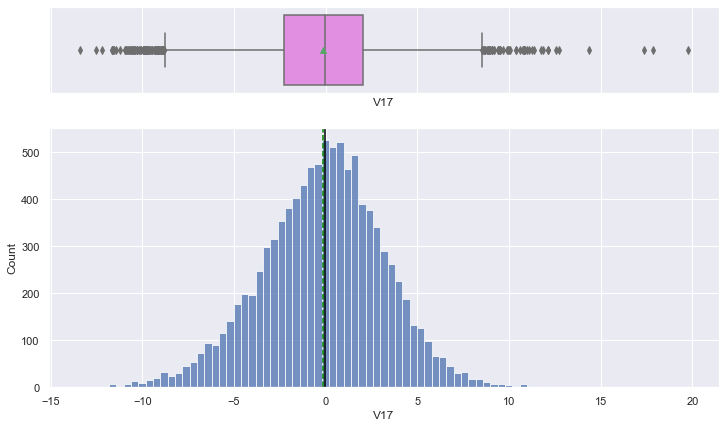

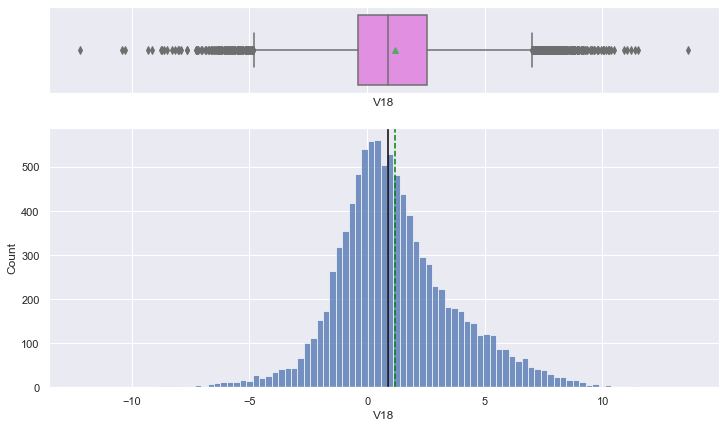

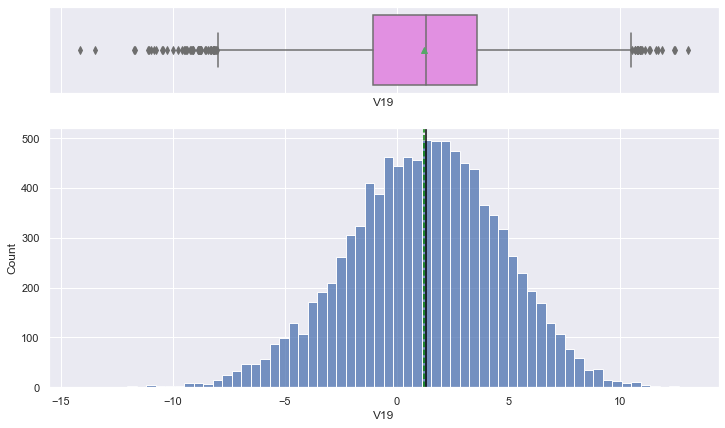

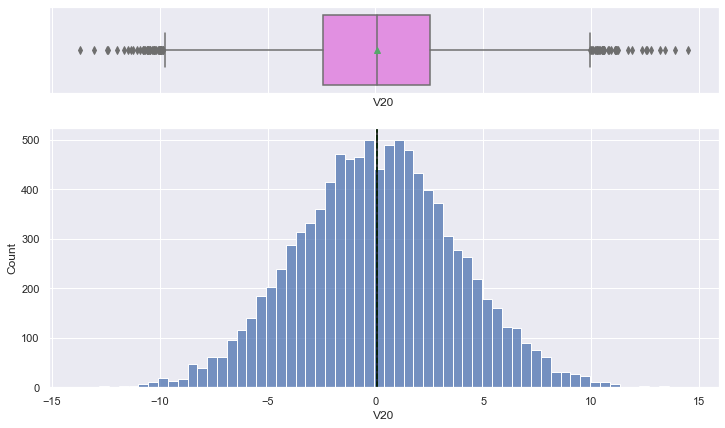

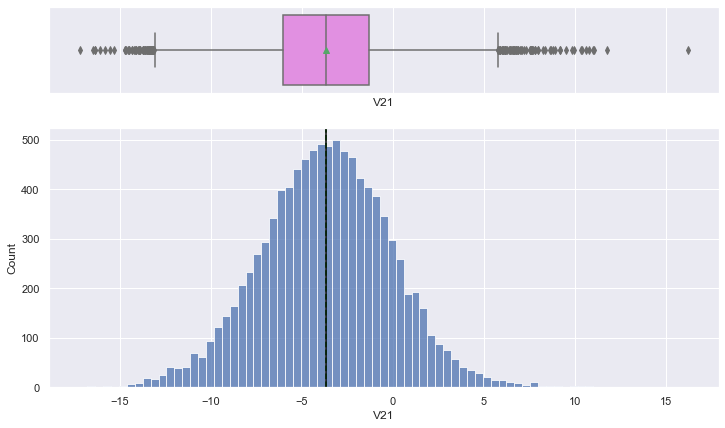

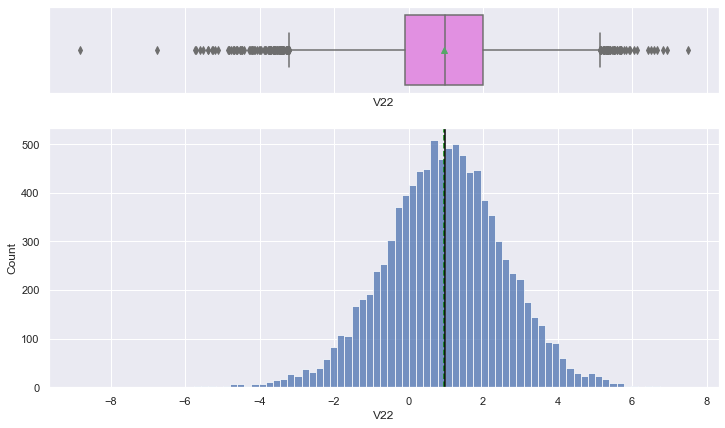

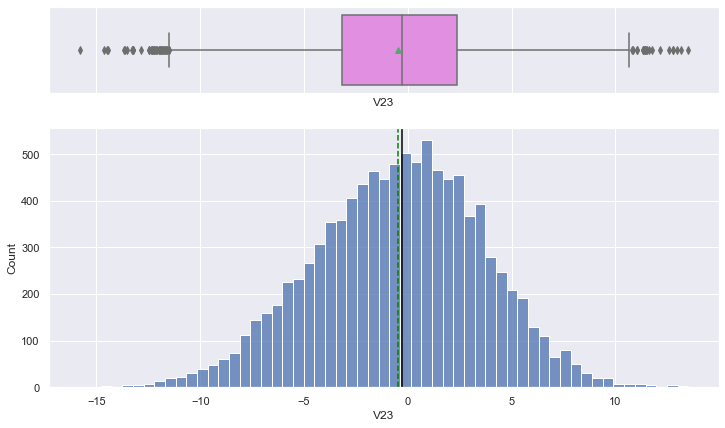

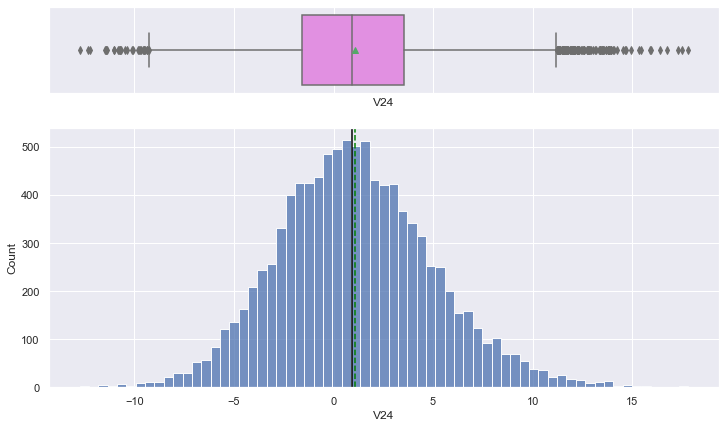

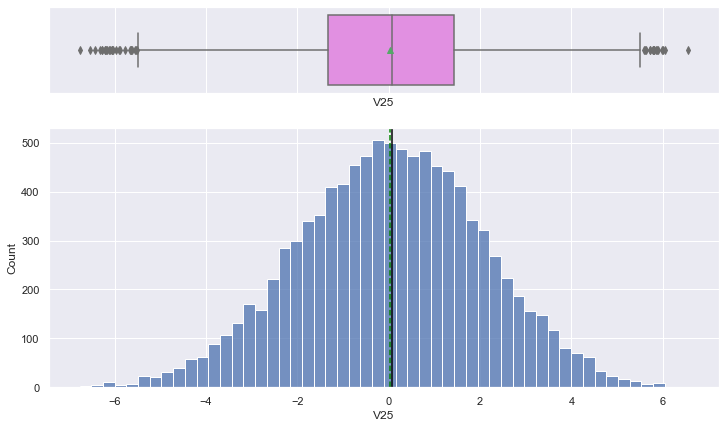

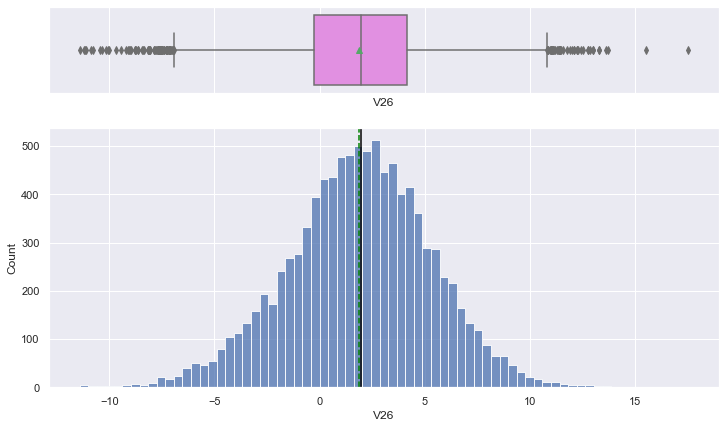

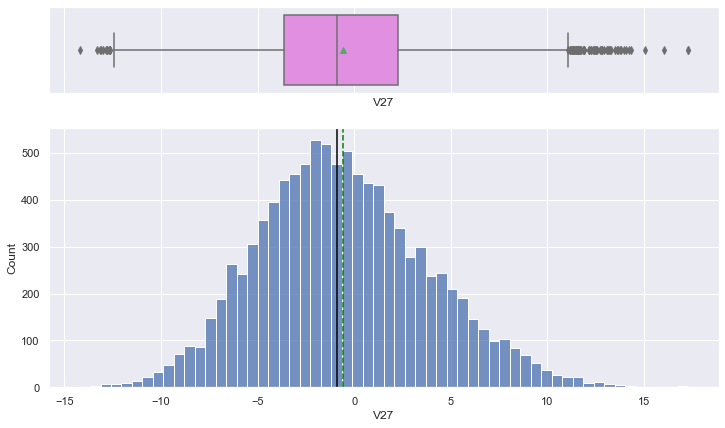

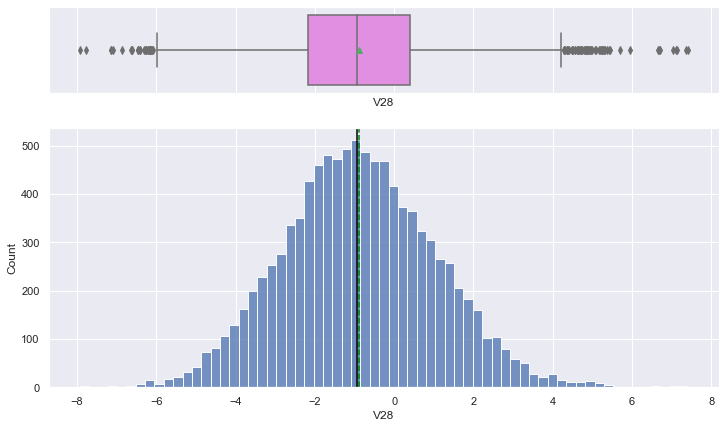

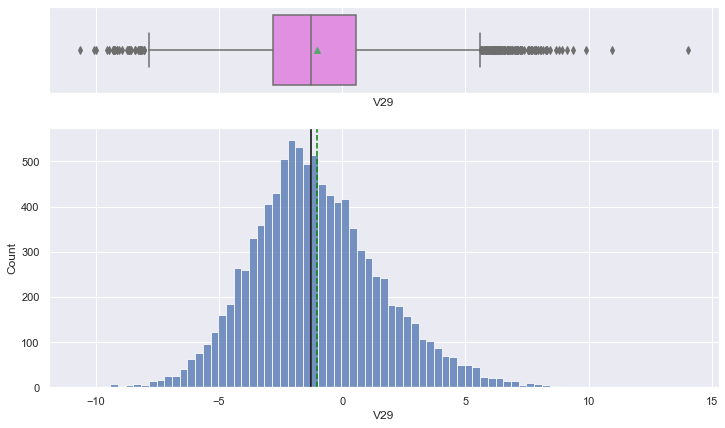

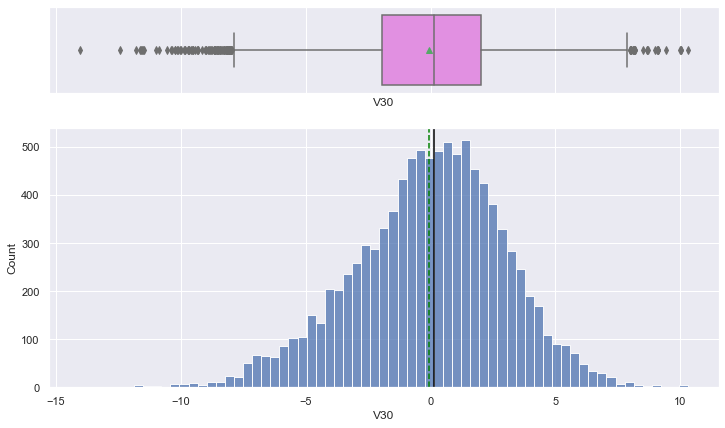

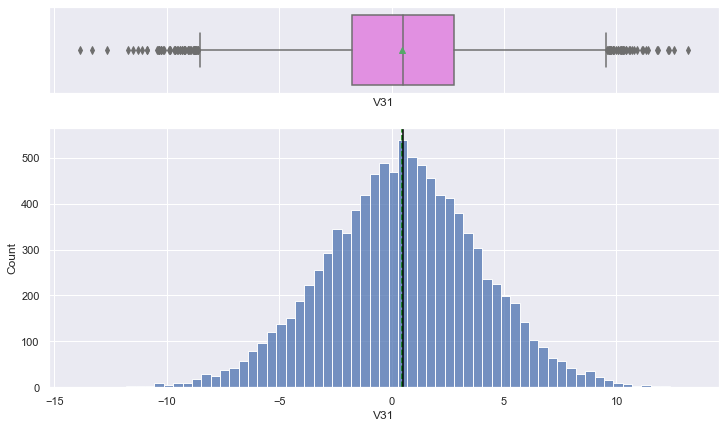

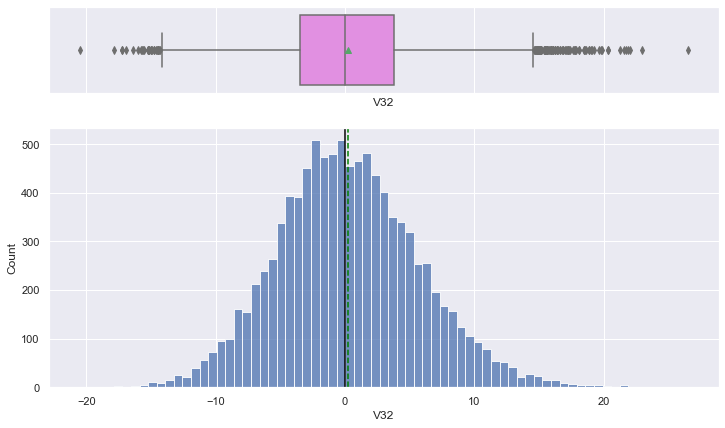

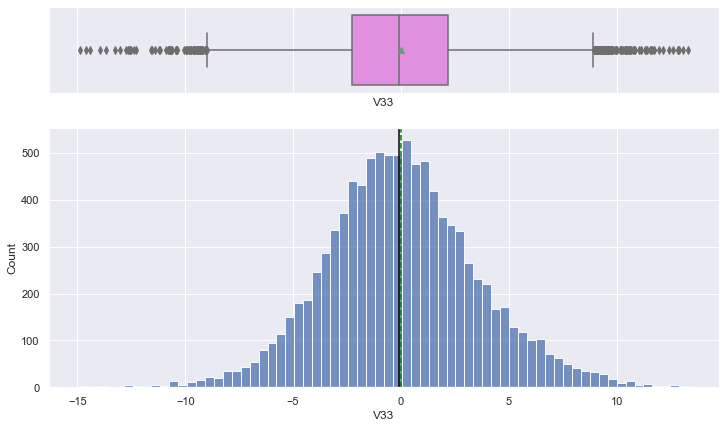

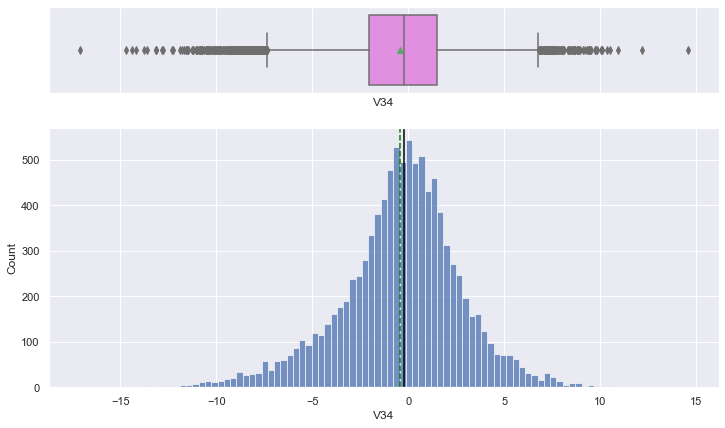

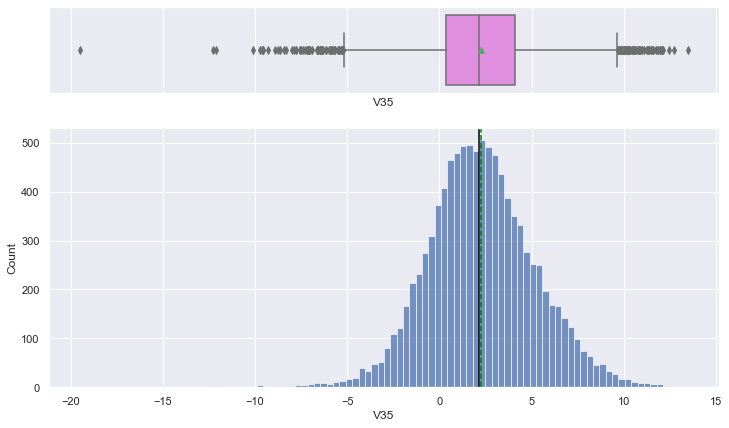

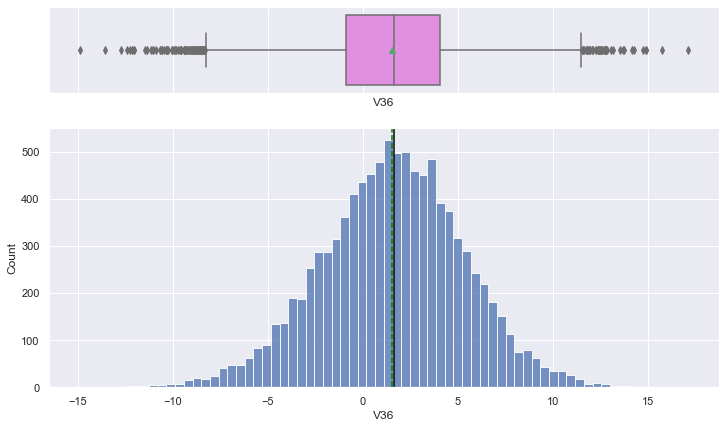

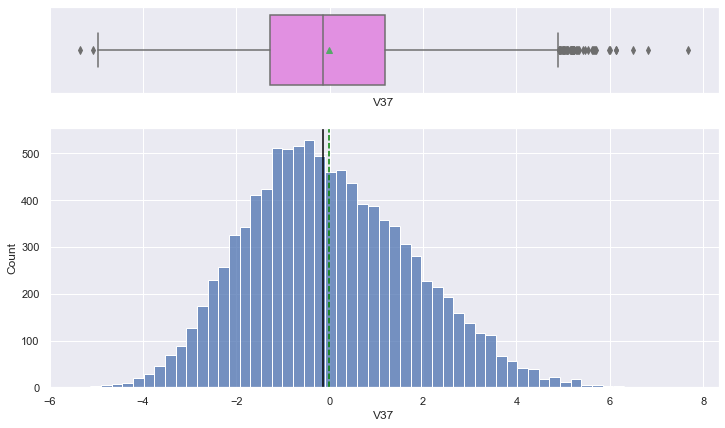

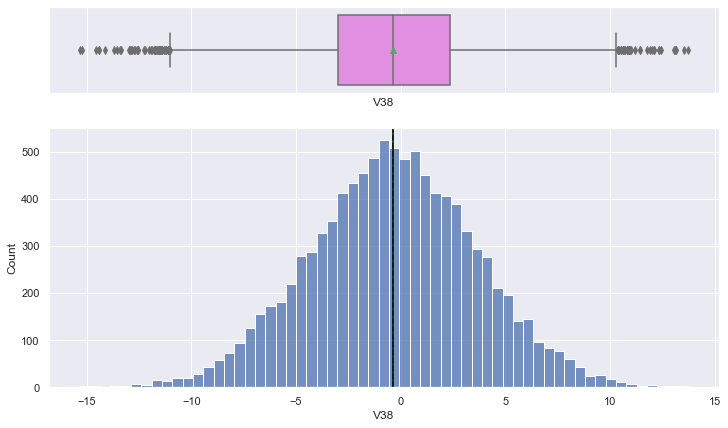

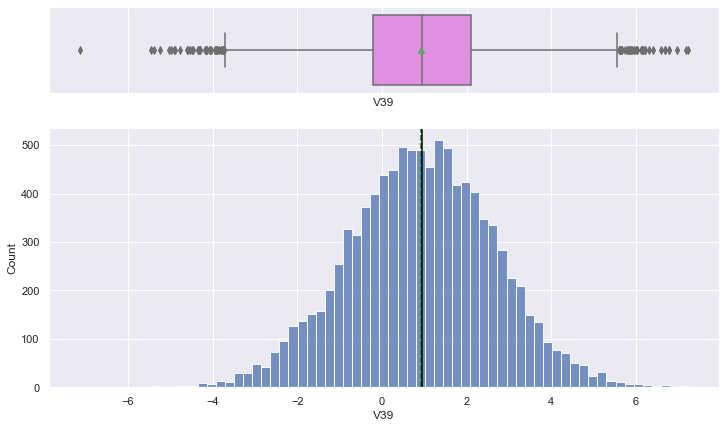

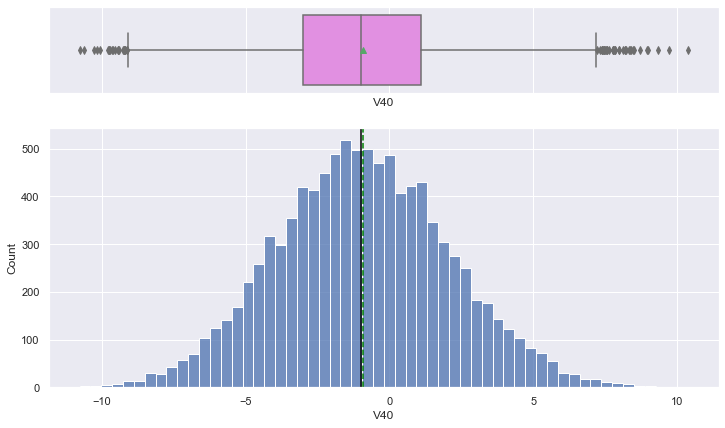

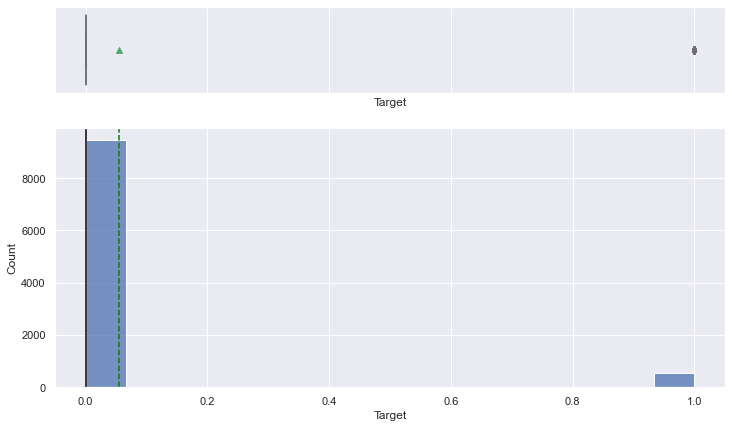

<IPython.core.display.Javascript object>

In [21]:
for feature in df.columns:
    histogram_boxplot(df_test, feature, figsize=(12, 7), kde=False, bins=None)

* The distributions of the independent variables in the test set are very similar to the train set. The distribution have a bell shape similar to a normal distriburion. The variables suffered a transformation, with negative values on the left side of the average and positives values on the right side of the average.

### Observations on Targe variable

<AxesSubplot:xlabel='Target', ylabel='count'>

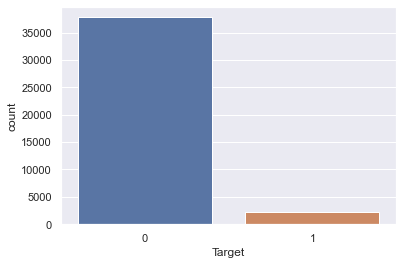

<IPython.core.display.Javascript object>

In [22]:
# Let's plot a countplot of the train Target
sns.countplot(data=df, x="Target")

<AxesSubplot:xlabel='Target', ylabel='count'>

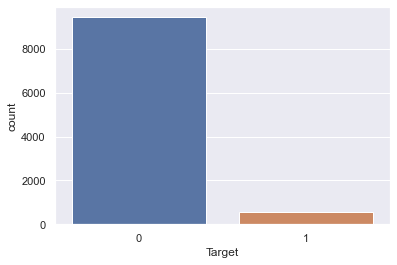

<IPython.core.display.Javascript object>

In [23]:
# Let's plot a countplot of the test Target
sns.countplot(data=df_test, x="Target")

In [24]:
# Let's check the percentage of each class for the train set
df["Target"].value_counts(normalize=True)

0   0.945
1   0.055
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

In [25]:
# Let's check the percentage of each class for the test set
df_test["Target"].value_counts(normalize=True)

0   0.945
1   0.055
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

* Both the train and test set have the same percentage of the classes in the target variable.
* The Target variable has 94.5% of no failure and 5.5% of failure class.
* The classes are unbalanced.

## Data Pre-processing

### Data Preparation for Modeling

In [26]:
# defining the dependent variable
Y = df["Target"]

# defining the independent variable
X = df.drop("Target", axis=1)

<IPython.core.display.Javascript object>

In [27]:
# Splitting data in train and validation sets
# Use stratify=Y to keep the same proportion of classes in the target variable in both train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.25, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [28]:
# checking the proportion of the target and independent variables in the train and validation set
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))

Shape of Training set :  (30000, 40)
Shape of Validation set :  (10000, 40)
Percentage of classes in training set:
0   0.945
1   0.055
Name: Target, dtype: float64
Percentage of classes in validation set:
0   0.945
1   0.055
Name: Target, dtype: float64


<IPython.core.display.Javascript object>

In [29]:
# defining the dependent variable for the test set
y_test = df_test["Target"]

# defining the independent variable for the test set
X_test = df_test.drop("Target", axis=1)

<IPython.core.display.Javascript object>

In [30]:
# checking the proportion of the target and independent variables in the test set
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Test set :  (10000, 40)
Percentage of classes in test set:
0   0.945
1   0.055
Name: Target, dtype: float64


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use median to impute missing values in V1 and V2 columns.

In [31]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ["V1", "V2"]

# Using SimpleImputer to impute the missing values with median
imputer = SimpleImputer(strategy="median")

# Fit and transform the train set
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation and test set
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [32]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isnull().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

<IPython.core.display.Javascript object>

* All the missing values have been treated.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [35]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Let's build different models and use KFold and cross_val_score to check the performance of our models.

In [36]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Reg", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic Reg: 0.48292682926829267
Decision Tree: 0.7335365853658538
Random Forest: 0.7621951219512195
Bagging: 0.7347560975609755
AdaBoost: 0.6164634146341463
GradientBoosting: 0.7170731707317073
XGBoost: 0.8158536585365853

Validation Performance:

Logistic Reg: 0.4625228519195612
Decision Tree: 0.7477148080438757
Random Forest: 0.7659963436928702
Bagging: 0.7349177330895795
AdaBoost: 0.6142595978062158
GradientBoosting: 0.7148080438756855
XGBoost: 0.8263254113345521


<IPython.core.display.Javascript object>

* The cross-validation Recall from the train set is similar to the Recall in the validation set. As we didn't check the other parameters we can't confirm for sure, but it seems that our models are generalizing well, at least when compared to the Recall score.

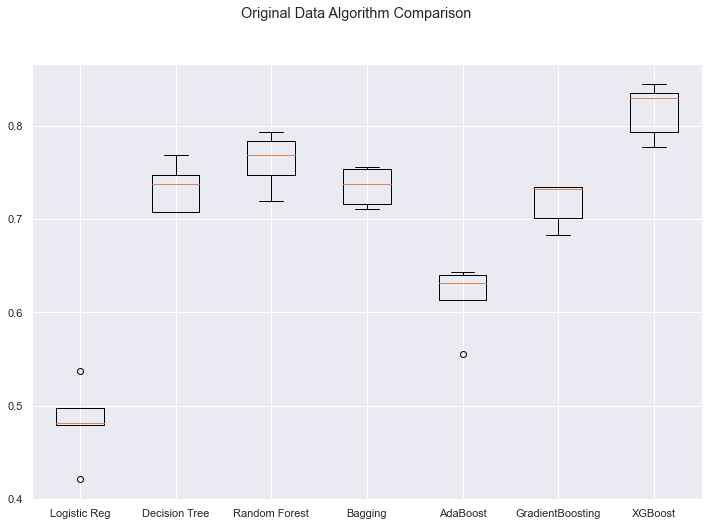

<IPython.core.display.Javascript object>

In [37]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12, 8))

fig.suptitle("Original Data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

* The model that is giving the highest cross-validated Recall in train set is XGBoost, followed by Random Forest, Decision Tree and Bagging Classifier.
* XGBoost performance on training set varies betweeen 0.77 to 0.85 Recall.
* Random Forest performance on training set varies betweeen 0.72 to 0.79 Recall.
* Decision Tree performance on training set varies betweeen 0.71 to 0.77 Recall.
* Bagging performance on training set varies betweeen 0.71 to 0.76 Recall.
* Decision Tree and Bagging Classifier are giving almost the same performance on Recall.
* We are going to build all the models with oversampled and undersampled data to see if we can improve the Recall.

### Model Building with Oversampled data

In [38]:
# let's do the oversampling (increase the training data in the unbalanced class 1)
print("Before Oversampling, counts of label 'Failure': {}".format(sum(y_train == 1)))
print(
    "Before Oversampling, counts of label 'No Failure': {} \n".format(sum(y_train == 0))
)

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print(
    "After Oversampling, counts of label 'Failure': {}".format(sum(y_train_over == 1))
)
print(
    "After Oversampling, counts of label 'No Failure': {} \n".format(
        sum(y_train_over == 0)
    )
)

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Failure': 1640
Before Oversampling, counts of label 'No Failure': 28360 

After Oversampling, counts of label 'Failure': 28360
After Oversampling, counts of label 'No Failure': 28360 

After Oversampling, the shape of train_X: (56720, 40)
After Oversampling, the shape of train_y: (56720,) 



<IPython.core.display.Javascript object>

**Let's build the models with oversampled train data and use KFold and cross_val_score to check if the performance of our models have improved.**

In [39]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Reg", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost with Oversampled Data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance with Oversampled Model:" "\n")

for name, model_2 in models:
    model_2.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model_2.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost with Oversampled Data:

Logistic Reg: 0.8754583921015515
Decision Tree: 0.9722143864598026
Random Forest: 0.9817348377997179
Bagging: 0.9730606488011284
AdaBoost: 0.8933004231311706
GradientBoosting: 0.9148095909732017
XGBoost: 0.9843794076163611

Validation Performance with Oversampled Model:

Logistic Reg: 0.8391224862888482
Decision Tree: 0.8135283363802559
Random Forest: 0.8683729433272395
Bagging: 0.8354661791590493
AdaBoost: 0.850091407678245
GradientBoosting: 0.8811700182815356
XGBoost: 0.8793418647166362


<IPython.core.display.Javascript object>

* The cross-validation Recall from the Oversampled train set is higher than the Recall in the validation set, but the difference is not so big and we can say that our models are generalizing. The Recall score is high for both train and validation set which is good.

* The cross-validation Recall from the Oversampled train set is higher than the cross-validation Recall from the Original data, for all the models.

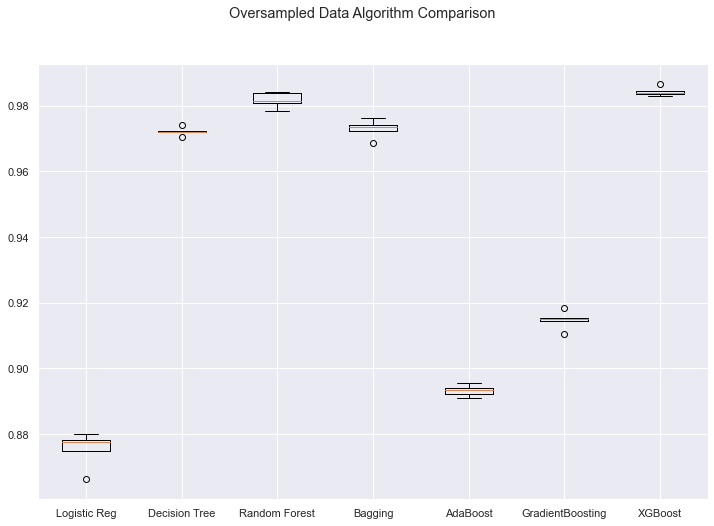

<IPython.core.display.Javascript object>

In [40]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12, 8))

fig.suptitle("Oversampled Data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

* **The Oversampled models have a better performance (high cross-validated Recall) than the models with the Original data.**


* The range of the cross-validated Recall is small for the Oversampled models, which is good. Our models will perform inside this range of high recall values.
* The model that is giving the highest cross-validated Recall in Oversampled train set is XGBoost, followed by Random Forest, Decision Tree and Bagging Classifier.
* XGBoost performance on training set varies betweeen 0.98 to 0.99 Recall.
* Random Forest performance on training set varies betweeen 0.978 to 0.985 Recall.
* Decision Tree performance on training set varies betweeen 0.97 to 0.975 Recall.
* Bagging performance on training set varies betweeen 0.972 to 0.979 Recall.
* Decision Tree and Bagging Classifier are giving almost the same performance on Recall.

### Model Building with Undersampled data

In [41]:
# let's do the undersampling (reduce the training data in the majority class 0)

print("Before Under Sampling, counts of label 'Failure': {}".format(sum(y_train == 1)))
print(
    "Before Under Sampling, counts of label 'No Failure': {} \n".format(
        sum(y_train == 0)
    )
)

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print(
    "After Under Sampling, counts of label 'Failure': {}".format(sum(y_train_un == 1))
)
print(
    "After Under Sampling, counts of label 'No Failure': {} \n".format(
        sum(y_train_un == 0)
    )
)

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Failure': 1640
Before Under Sampling, counts of label 'No Failure': 28360 

After Under Sampling, counts of label 'Failure': 1640
After Under Sampling, counts of label 'No Failure': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



<IPython.core.display.Javascript object>

**Let's build the models with undersampled train data and use KFold and cross_val_score to check if the performance of our models have improved.**

In [42]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Reg", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost with Undersampled Data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance with Undersampled Model:" "\n")

for name, model_3 in models:
    model_3.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model_3.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost with Undersampled Data:

Logistic Reg: 0.8554878048780488
Decision Tree: 0.8591463414634146
Random Forest: 0.8981707317073171
Bagging: 0.875
AdaBoost: 0.8725609756097562
GradientBoosting: 0.8878048780487804
XGBoost: 0.8939024390243903

Validation Performance with Undersampled Model:

Logistic Reg: 0.8464351005484461
Decision Tree: 0.8537477148080439
Random Forest: 0.8848263254113345
Bagging: 0.8628884826325411
AdaBoost: 0.8647166361974405
GradientBoosting: 0.8884826325411335
XGBoost: 0.9012797074954296


<IPython.core.display.Javascript object>

* The cross-validation Recall from the Undersampled train set is similar to the Recall in the validation set. As we didn't check the other parameters we can't confirm for sure, but it seems that our models are generalizing, at least when compared to the Recall score.

* The cross-validation Recall from the Undersampled train set is higher than the cross-validation Recall from the Original data, but is lower than the cross-validation Recall from the Oversampled data, for all the models.

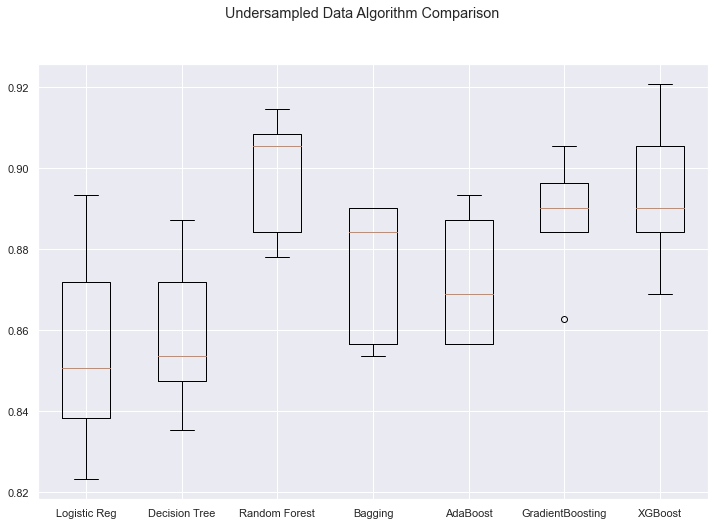

<IPython.core.display.Javascript object>

In [43]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12, 8))

fig.suptitle("Undersampled Data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

* **The Undersampled models have a better performance (high cross-validated Recall) than the models with the Original data, but worse performance that the models with the Oversampled data.**


* The range of the cross-validated Recall is large for the Undersampled models.
* The model that is giving the highest cross-validated Recall in Undersampled train set is XGBoost, followed by Random Forest, and Gradient Boosting.
* XGBoost performance on training set varies betweeen 0.87 to 0.92 Recall.
* Random Forest performance on training set varies betweeen 0.88 to 0.915 Recall.
* Gradient Boosting performance on training set varies betweeen 0.86 to 0.91 Recall.

* **The models with the highest cross-validated Recall are the Oversampled models XGBoost, Random Forest, Decision Tree and Bagging Classifier. This models have a short range of cross_validated Recall as well, which guarantee that our models will return a good Recall score (inside that high range of values.)** 
* We will tune this models and see if the performance improves.
* We will use the RandomizedSearchCV in our hyperparameter tuning, since this search executes faster than GridSearch and generaly perform better than GridSearch.

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### XGBoost with Oversampled train data and RandomizedSearchCV

In [44]:
%%time

# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=40,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9959802538787024:
CPU times: user 3min 13s, sys: 6.54 s, total: 3min 20s
Wall time: 58min 37s


<IPython.core.display.Javascript object>

In [45]:
# building model with best parameters
xgb_over_tuned = XGBClassifier(
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
    random_state=1,
    eval_metric="logloss",
)

# Fit the model on training data
xgb_over_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [46]:
# Calculating different metrics on train set
xgb_over_tuned_train_perf = model_performance_classification_sklearn(
    xgb_over_tuned, X_train_over, y_train_over
)
print("Training performance:")
xgb_over_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994,1.000,0.988,0.994


<IPython.core.display.Javascript object>

In [47]:
# Calculating different metrics on validation set
xgb_over_tuned_val_perf = model_performance_classification_sklearn(
    xgb_over_tuned, X_val, y_val
)
print("Validation performance:")
xgb_over_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.974,0.905,0.702,0.791


<IPython.core.display.Javascript object>

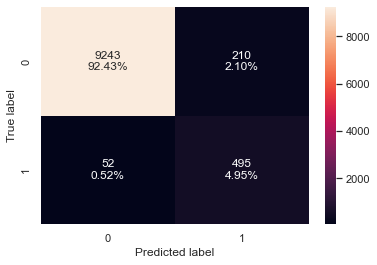

<IPython.core.display.Javascript object>

In [48]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_over_tuned, X_val, y_val)

* The XGBoost tuned model with oversampled data lost performance on Precision, but not on Recall.
* The Recall is 1 on train set and 0.9 on validation set, a very good value.

### Random Forest with Oversampled train data and RandomizedSearchCV

In [49]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=60,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9780324400564175:
CPU times: user 45.9 s, sys: 517 ms, total: 46.4 s
Wall time: 15min 23s


<IPython.core.display.Javascript object>

In [50]:
# building model with best parameters
rf_over_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt",
)

# Fit the model on training data
rf_over_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

In [51]:
# Calculating different metrics on train set
rf_over_tuned_train_perf = model_performance_classification_sklearn(
    rf_over_tuned, X_train_over, y_train_over
)
print("Training performance:")
rf_over_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [52]:
# Calculating different metrics on validation set
rf_over_tuned_val_perf = model_performance_classification_sklearn(
    rf_over_tuned, X_val, y_val
)
print("Validation performance:")
rf_over_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.990,0.872,0.948,0.909


<IPython.core.display.Javascript object>

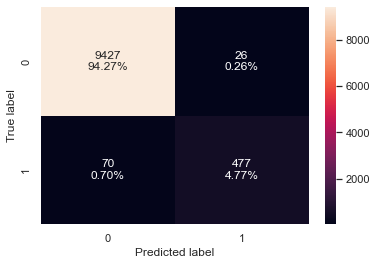

<IPython.core.display.Javascript object>

In [53]:
# creating confusion matrix
confusion_matrix_sklearn(rf_over_tuned, X_val, y_val)

* The Random Forest tuned model with oversampled train data is generalizing.
* In the validation set the Recall is lower than the XGBoost model, but the precision and F1 score are higher. The Random Forest model in the validation set is more balanced than the XGBoost model.

### Decision Tree with Oversampled train data and RandomizedSearchCV

In [54]:
%%time

# defining model
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_depth': np.arange(2,6), 
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10, 15], 
              'min_impurity_decrease': [0.0001,0.001] }

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=60,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8526093088857545:
CPU times: user 1.68 s, sys: 178 ms, total: 1.86 s
Wall time: 29.7 s


<IPython.core.display.Javascript object>

In [55]:
# building model with best parameters
dtree_over_tuned = DecisionTreeClassifier(
    random_state=1,
    max_depth=5,
    min_samples_leaf=1,
    max_leaf_nodes=15,
    min_impurity_decrease=0.0001,
)

# Fit the model on training data
dtree_over_tuned.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

In [56]:
# Calculating different metrics on train set
dtree_over_tuned_train_perf = model_performance_classification_sklearn(
    dtree_over_tuned, X_train_over, y_train_over
)
print("Training performance:")
dtree_over_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.896,0.858,0.929,0.892


<IPython.core.display.Javascript object>

In [57]:
# Calculating different metrics on validation set
dtree_over_tuned_val_perf = model_performance_classification_sklearn(
    dtree_over_tuned, X_val, y_val
)
print("Validation performance:")
dtree_over_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.924,0.808,0.404,0.539


<IPython.core.display.Javascript object>

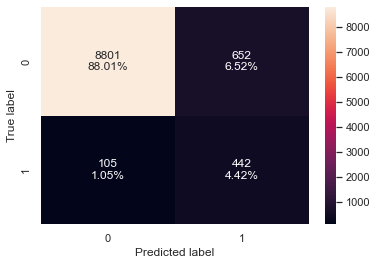

<IPython.core.display.Javascript object>

In [58]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_over_tuned, X_val, y_val)

* The Decision Tree tuned estimator with oversampled train data is overfitting the train set. 
* In the validation set, the Recall value is almost the same as the Recall on the train set, but the Precision and F1 score are very low.

### Bagging Classifier with Oversampled train data and RandomizedSearchCV

In [59]:
%%time

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9], 
              'n_estimators' : [30,50,70], }


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=60,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:
CPU times: user 850 ms, sys: 216 ms, total: 1.07 s
Wall time: 18min 40s


<IPython.core.display.Javascript object>

In [60]:
# building model with best parameters
bagg_over_tuned = BaggingClassifier(
    random_state=1, max_samples=1, max_features=0.7, n_estimators=50,
)

# Fit the model on training data
bagg_over_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

In [61]:
# Calculating different metrics on train set
bagg_over_tuned_train_perf = model_performance_classification_sklearn(
    bagg_over_tuned, X_train_over, y_train_over
)
print("Training performance:")
bagg_over_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


<IPython.core.display.Javascript object>

In [62]:
# Calculating different metrics on validation set
bagg_over_tuned_val_perf = model_performance_classification_sklearn(
    bagg_over_tuned, X_val, y_val
)
print("Validation performance:")
bagg_over_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.055,1.000,0.055,0.104


<IPython.core.display.Javascript object>

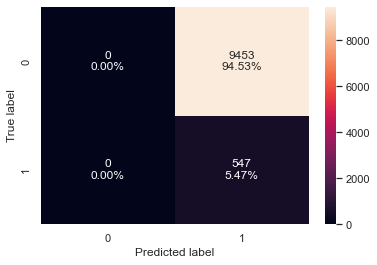

<IPython.core.display.Javascript object>

In [63]:
# creating confusion matrix
confusion_matrix_sklearn(bagg_over_tuned, X_val, y_val)

* The Bagging Classifier tuned model with oversampled train data is underfitting the train and test set. Despite the high Recall, the Accuracy, Precision and F1 score are very low.
* The Bagging Classifier model is predicting all the classes as 1 (Failure) as shown in the confusion matrix. 

## Model performance comparison and choosing the final model

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_over_tuned_train_perf.T,
        rf_over_tuned_train_perf.T,
        dtree_over_tuned_train_perf.T,
        bagg_over_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Oversampled Tuned",
    "Random Forest Oversampled Tuned",
    "Decision Tree Oversampled Tuned",
    "Bagging Oversampled Tuned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost Oversampled Tuned,Random Forest Oversampled Tuned,Decision Tree Oversampled Tuned,Bagging Oversampled Tuned
Accuracy,0.994,1.000,0.896,0.500
Recall,1.000,0.999,0.858,1.000
Precision,0.988,1.000,0.929,0.500
F1,0.994,1.000,0.892,0.667


<IPython.core.display.Javascript object>

In [65]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        xgb_over_tuned_val_perf.T,
        rf_over_tuned_val_perf.T,
        dtree_over_tuned_val_perf.T,
        bagg_over_tuned_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost Oversampled Tuned",
    "Random Forest Oversampled Tuned",
    "Decision Tree Oversampled Tuned",
    "Bagging Oversampled Tuned",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost Oversampled Tuned,Random Forest Oversampled Tuned,Decision Tree Oversampled Tuned,Bagging Oversampled Tuned
Accuracy,0.974,0.990,0.924,0.055
Recall,0.905,0.872,0.808,1.000
Precision,0.702,0.948,0.404,0.055
F1,0.791,0.909,0.539,0.104


<IPython.core.display.Javascript object>

* The best model is XGBoost, with the highest Recall. 
* The second best model is Random Forest.
* Decicion Tree is overfitting the data and Bagging Classifier is underfitting the data. These are not good models.

### Test set final performance

In [66]:
# Calculating different metrics on the test set
xgb_over_tuned_test_perf = model_performance_classification_sklearn(
    xgb_over_tuned, X_test, y_test
)
print("Test performance:")
xgb_over_tuned_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.971,0.885,0.683,0.771


<IPython.core.display.Javascript object>

* The perfomance on test data is similar to the performance on validation data. The Recall is still a good value.

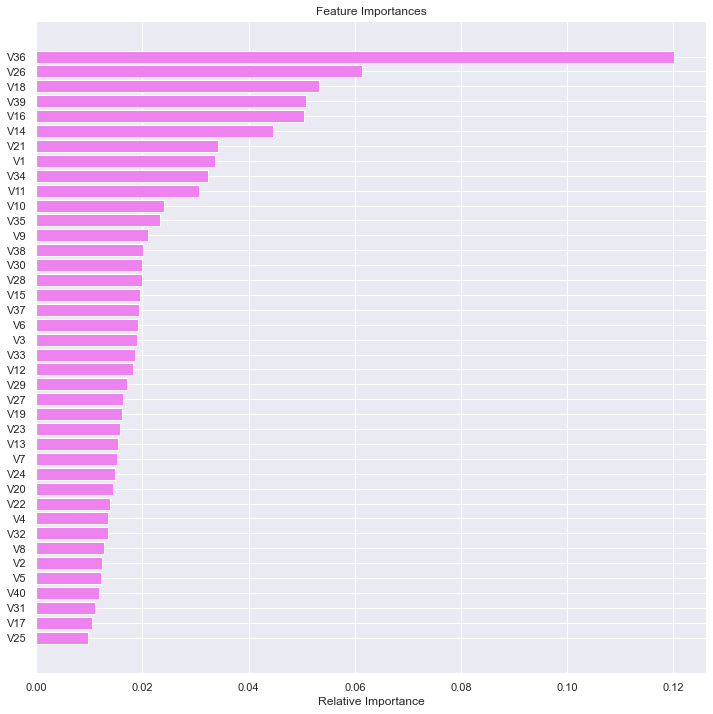

<IPython.core.display.Javascript object>

In [67]:
feature_names = X.columns
importances = xgb_over_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features in XGBoost estimator is V36, followed by V26, V18 and V39. 
* All the features have some imporance in this model.

## Pipelines to build the final model

* Now, we have a final model. let's use pipelines to put the model into production.

* We are not going to use Column Transformer to treat the missing values because we have only numerical variables, and we need to apply the oversample function in the train set only.
* We are going to treat the missing values in the train and test set, and then apply the oversampled function to the train set olnly. 
* After the variables treatment we are going to build our pipeline with our best estimator.



* Since the data set given was already split in train and test set, we don't need to split the train set.
* We are only defining the dependent and independent variables in train and test set.

In [68]:
# defining the dependent variable
y_train = df["Target"]
y_test = df_test["Target"]

# defining the independent variable
X_train = df.drop("Target", axis=1)
X_test = df_test.drop("Target", axis=1)

print(X_train.shape, X_test.shape)

(40000, 40) (10000, 40)


<IPython.core.display.Javascript object>

In [69]:
# Using SimpleImputer to impute the missing values with median
imputer = SimpleImputer(strategy="median")

# Fit and transform the train set
X_train = imputer.fit_transform(X_train)

# Transform the test set
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

In [70]:
# let's do the oversampling (increase the training data in the unbalanced class 1)

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [71]:
# Creating new pipeline with best parameters for XGBoost

model = Pipeline(
    steps=[
        (
            "XGBoost",
            XGBClassifier(
                subsample=0.9,
                scale_pos_weight=10,
                n_estimators=250,
                learning_rate=0.1,
                gamma=5,
                random_state=1,
                eval_metric="logloss",
            ),
        )
    ]
)

# Fit the model on training data
model.fit(X_train_over, y_train_over)

Pipeline(steps=[('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=5, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

<IPython.core.display.Javascript object>

In [72]:
# Let's check the performance on test set
model_test = model_performance_classification_sklearn(model, X_test, y_test)
model_test

,Accuracy,Recall,Precision,F1
0,0.965,0.887,0.623,0.732


<IPython.core.display.Javascript object>

* The model is giving a performance similar to the validation and previous test set. The model is generalizing well and the Recall score has a good value.

# Business Insights and Conclusions

* The ten features more important in identify failures, according to the XGBoost estimator, are V36, V26, V18, V39, V16, V14, V21, V1, V34 and V11. 
* The company can get these more important sensores and deciphered them to gain more insights.
* This sensors should have an exclusive plan of inspection and maintenance, with short time between inspections/maintenance than the other sensors. In a case of failure of multiple sensors, this sensors should have prioritiy over the others. This sensors should have a backup sensor, ready to go into operation, in case of a failure.
* The company should build a classification model with the non ciphered data, where an EDA with bivariate and multivariate analysis could be developed to gain more insights.
* The company should have a criterion to decide the frequency of running the XGBoost estimator to predict the generator failure. It could be based on time or on the size of the dataset colected.
* The company should have a criterion to decide when to rebuild the classification model. It could be based on time or every time that there is a technological update in the sensors or equipaments related to the generator.